# **Vibration Analysis System: Early Fault Detection Using Machine Learning**
# **Predictive Maintenance using NASA/IMS Bearing Dataset**

## **Section 1: Introduction**
This project applies machine learning techniques to the **NASA/IMS Bearing Dataset**, which contains vibration signals from run-to-failure experiments of rotating bearings. The experiments were conducted under controlled conditions with a constant speed of **2000 RPM** and a **radial load of 6000 lbs**. Accelerometers were mounted on the bearing housing to capture high-frequency vibration signals until bearing failures occurred.  


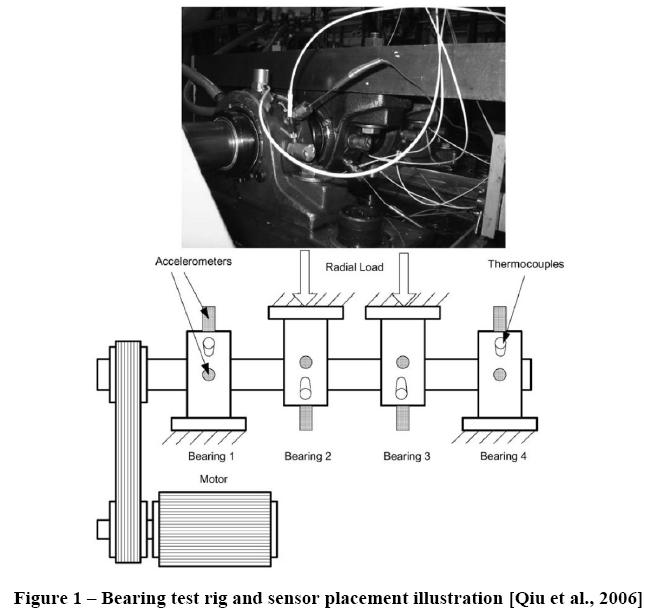

### **1.2 Dataset Overview**
The dataset consists of **three run-to-failure experiments**, each containing vibration snapshots of 1 second (20,480 points) sampled at **20 kHz**. Files are recorded every 10 minutes (some initial files every 5 minutes). 
> The data you have is recorded at Sampling Rate = 20,480 Hz (meaning 20,480 points per second).


| Dataset | Duration | Files | Channels | Faults Observed |
|---------|----------|-------|----------|-----------------|
| **Set 1** | Oct 22, 2003 – Nov 25, 2003 | 2156 | 8 (2 per bearing: x- and y-axis) | Bearing 3: Inner race defect; Bearing 4: Roller element defect |
| **Set 2** | Feb 12, 2004 – Feb 19, 2004 | 984 | 4 (1 per bearing) | Bearing 1: Outer race defect |
| **Set 3** | Mar 4, 2004 – Apr 4, 2004 | 6324 | 4 (1 per bearing) | Bearing 3: Outer race defect |

### **1.3 Types of Defect in Bearing**

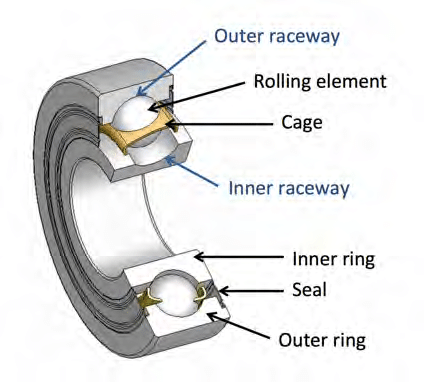

### **1.4 Project Objective**
The primary goal is to develop a robust, predictive system that can detect bearing deterioration in its early stages. By analyzing time-domain of bearing vibrations, we aim to establish early warning indicators for known failure modes. This understanding will enable maintenance teams to intervene at the optimal time, before failures become critical but not so early as to waste bearing life.

### **1.5 Project Importance**
Early detection of bearing deterioration is crucial across numerous industries, from manufacturing to power generation. Bearing failures can lead to costly downtime, safety hazards, and cascading equipment damage. Traditional maintenance schedules often result in either premature replacement of healthy bearings or unexpected failures of degraded ones. This project's intelligent monitoring approach offers several key benefits:

- **Cost Reduction**: Early detection allows for planned maintenance rather than emergency repairs
- **Safety Enhancement**: Preventing catastrophic failures reduces workplace hazards
- **Equipment Longevity**: Optimal maintenance timing extends bearing and machinery lifespan
- **Production Efficiency**: Minimizing unexpected downtime improves overall operational efficiency

---

## **Section 2: Data Analysis and Exploration**

### **2.1 Import Libraries**

####  Essential Python Libraries

In [22]:
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path

####  Data Analysis Libraries

In [23]:
import numpy as np
import pandas as pd

####  Visualization Libraries

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Machine Learning Libraries

Data Split Libraries

In [25]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

Preprocessing libraries

In [26]:
# Libraries for Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Libraries for Feature Scaling
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer

Handling imbalanced data libraries

In [27]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

Pipeline libraries

In [28]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Important so we can add SMOTE to the pipeline
from sklearn.pipeline import Pipeline

Machine Learning Libraries - Models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier

Evaluation Metrics

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report, roc_curve, auc

---

### **2.2 Loading The Files**

**Quick check on the dataset:**
- Prints the name of the first and last file (to ensure the data is complete from start to finish).

- Prints the number of files in the folder (this gives you an idea of ​​the length of the experiment).

In [31]:
# Using pathlib library
# Update path to match your folder structure
data_path_1 = Path("E:/Omar/Courses/ML (AMIT)/ML/Final Machine Learning Project/datasets/1st_test")  ### Change path

# List files in the directory
file_1 = list(data_path_1.glob('*'))  # Bring all the files inside the folder (Converts the result to a list named file_1)
# file_1 = A list containing the full paths to all files in the dataset folder.

# Get name of first and last file 
print('First File:', file_1[0].name)
print('Last File:', file_1[-1].name)

# Let's look at first file
print("No. of files in 1st_test:", len(file_1))
print("​​the length of the experiment 1 about ~ 360 hr ~ 15 days")

First File: 2003.10.22.12.06.24
Last File: 2003.11.25.23.39.56
No. of files in 1st_test: 2156
​​the length of the experiment 1 about ~ 360 hr ~ 15 days


In [32]:
# Update path to match your folder structure
data_path_2 = Path("E:/Omar/Courses/ML (AMIT)/ML/Final Machine Learning Project/datasets/2nd_test")    ### Change path

# List files in the directory
file_2 = list(data_path_2.glob('*'))  # Bring all the files inside the folder (Converts the result to a list named file_1)
# file_1 = A list containing the full paths to all files in the dataset folder.

# Get name of first and last file 
print('First File:', file_2[0].name)
print('Last File:', file_2[-1].name)

# Let's look at first file
print("No. of files in 2st_test:", len(file_2))
print("​​the length of the experiment 2 about ~ 164 hr ~ 7 days")

First File: 2004.02.12.10.32.39
Last File: 2004.02.19.06.22.39
No. of files in 2st_test: 984
​​the length of the experiment 2 about ~ 164 hr ~ 7 days


In [33]:
# Update path to match your folder structure
data_path_3 = Path("E:/Omar/Courses/ML (AMIT)/ML/Final Machine Learning Project/datasets/3nd_test")    ### Change path

# List files in the directory
file_3 = list(data_path_3.glob('*'))  # Bring all the files inside the folder (Converts the result to a list named file_1)
# file_1 = A list containing the full paths to all files in the dataset folder.

# Get name of first and last file 
print('First File:', file_3[0].name)
print('Last File:', file_3[-1].name)

# Let's look at first file
print("No. of files in 3st_test:", len(file_3))
print("​​the length of the experiment 3 about ~ 1054 hr ~ 44 days")

First File: 2004.03.04.09.27.46
Last File: 2004.04.18.02.42.55
No. of files in 3st_test: 6324
​​the length of the experiment 3 about ~ 1054 hr ~ 44 days


Now that we have loaded our datasets, let’s explore their contents and familiarize ourselves with the structure of the files:  

**File Inspection**
- Read **the First File from each set** (1st, 2nd, 3rd test sets).
- Display the array size and number of samples.
- Display the first values ​​from the signal to ensure the data is correct.

1st set

In [34]:
# First file path in the list (meaning the first vibration recording).
first_file_path = file_1[0]

# Read first file of the experiment 1
raw_data_1 = np.loadtxt(first_file_path)

print("The shape of the dataset 1 ==>", raw_data_1.shape)
print("\n First 5 row of data \n", raw_data_1[ : 5])

The shape of the dataset 1 ==> (20480, 8)

 First 5 row of data 
 [[-0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142]
 [-0.105 -0.017 -0.164 -0.183 -0.049  0.029 -0.115 -0.122]
 [-0.183 -0.098 -0.195 -0.125 -0.005 -0.007 -0.171 -0.071]
 [-0.178 -0.161 -0.159 -0.178 -0.1   -0.115 -0.112 -0.078]
 [-0.208 -0.129 -0.261 -0.098 -0.151 -0.205 -0.063 -0.066]]


2nd set

In [35]:
# First file path in the list (meaning the first vibration recording).
first_file_path = file_2[0]

# Read first file of the experiment 2
raw_data_2 = np.loadtxt(first_file_path)

print("The shape of the dataset 2 ==>", raw_data_2.shape)
print("\n First 5 row of data \n", raw_data_2[ : 5])

The shape of the dataset 2 ==> (20480, 4)

 First 5 row of data 
 [[-0.049 -0.071 -0.132 -0.01 ]
 [-0.042 -0.073 -0.007 -0.105]
 [ 0.015  0.     0.007  0.   ]
 [-0.051  0.02  -0.002  0.1  ]
 [-0.107  0.01   0.127  0.054]]


3rd set

In [36]:
# First file path in the list (meaning the first vibration recording).
first_file_path = file_3[0]

# Read first file of the experiment 3
raw_data_3 = np.loadtxt(first_file_path)

print("The shape of the dataset 3 ==>", raw_data_3.shape)
print("\n First 5 row of data \n", raw_data_3[ : 5])

The shape of the dataset 3 ==> (20480, 4)

 First 5 row of data 
 [[ 0.034  0.264  0.039 -0.046]
 [ 0.103  0.083 -0.061 -0.012]
 [ 0.095 -0.039 -0.007  0.039]
 [ 0.     0.11   0.022 -0.002]
 [ 0.005  0.154 -0.127 -0.02 ]]


### **2.3 Explorating Files**

Now, let’s visualize the raw vibration data to understand how each channel behaves over time:

- We start by creating a time array for the x-axis, our default sampling rate is 20kHz as told in our dataset.
- **Dataset 1**:  
  - We create plots for the 8 channels in this dataset, plotting the amplitude against time for each channel.  
- **Dataset 2**:  
  - A similar approach is applied for the 4 channels in the second dataset.  
- **Dataset 3**:  
  - Finally, we plot the 4 channels in the third dataset using the same structure.


Time Calculation Formula:

<center>

$t = \dfrac{n}{f_s}$

</center>

- $t$ → Time in seconds  
- $n$ → Sample index $(n = 20480)$
- $f_s$ → Sampling rate in Hertz (Hz = samples/second = 20,000) 

In [37]:
# Function to create time array for x-axis
def create_time(data_length, sampling_rate=20000):
    return np.arange(data_length) / sampling_rate

#### **For 1st set**

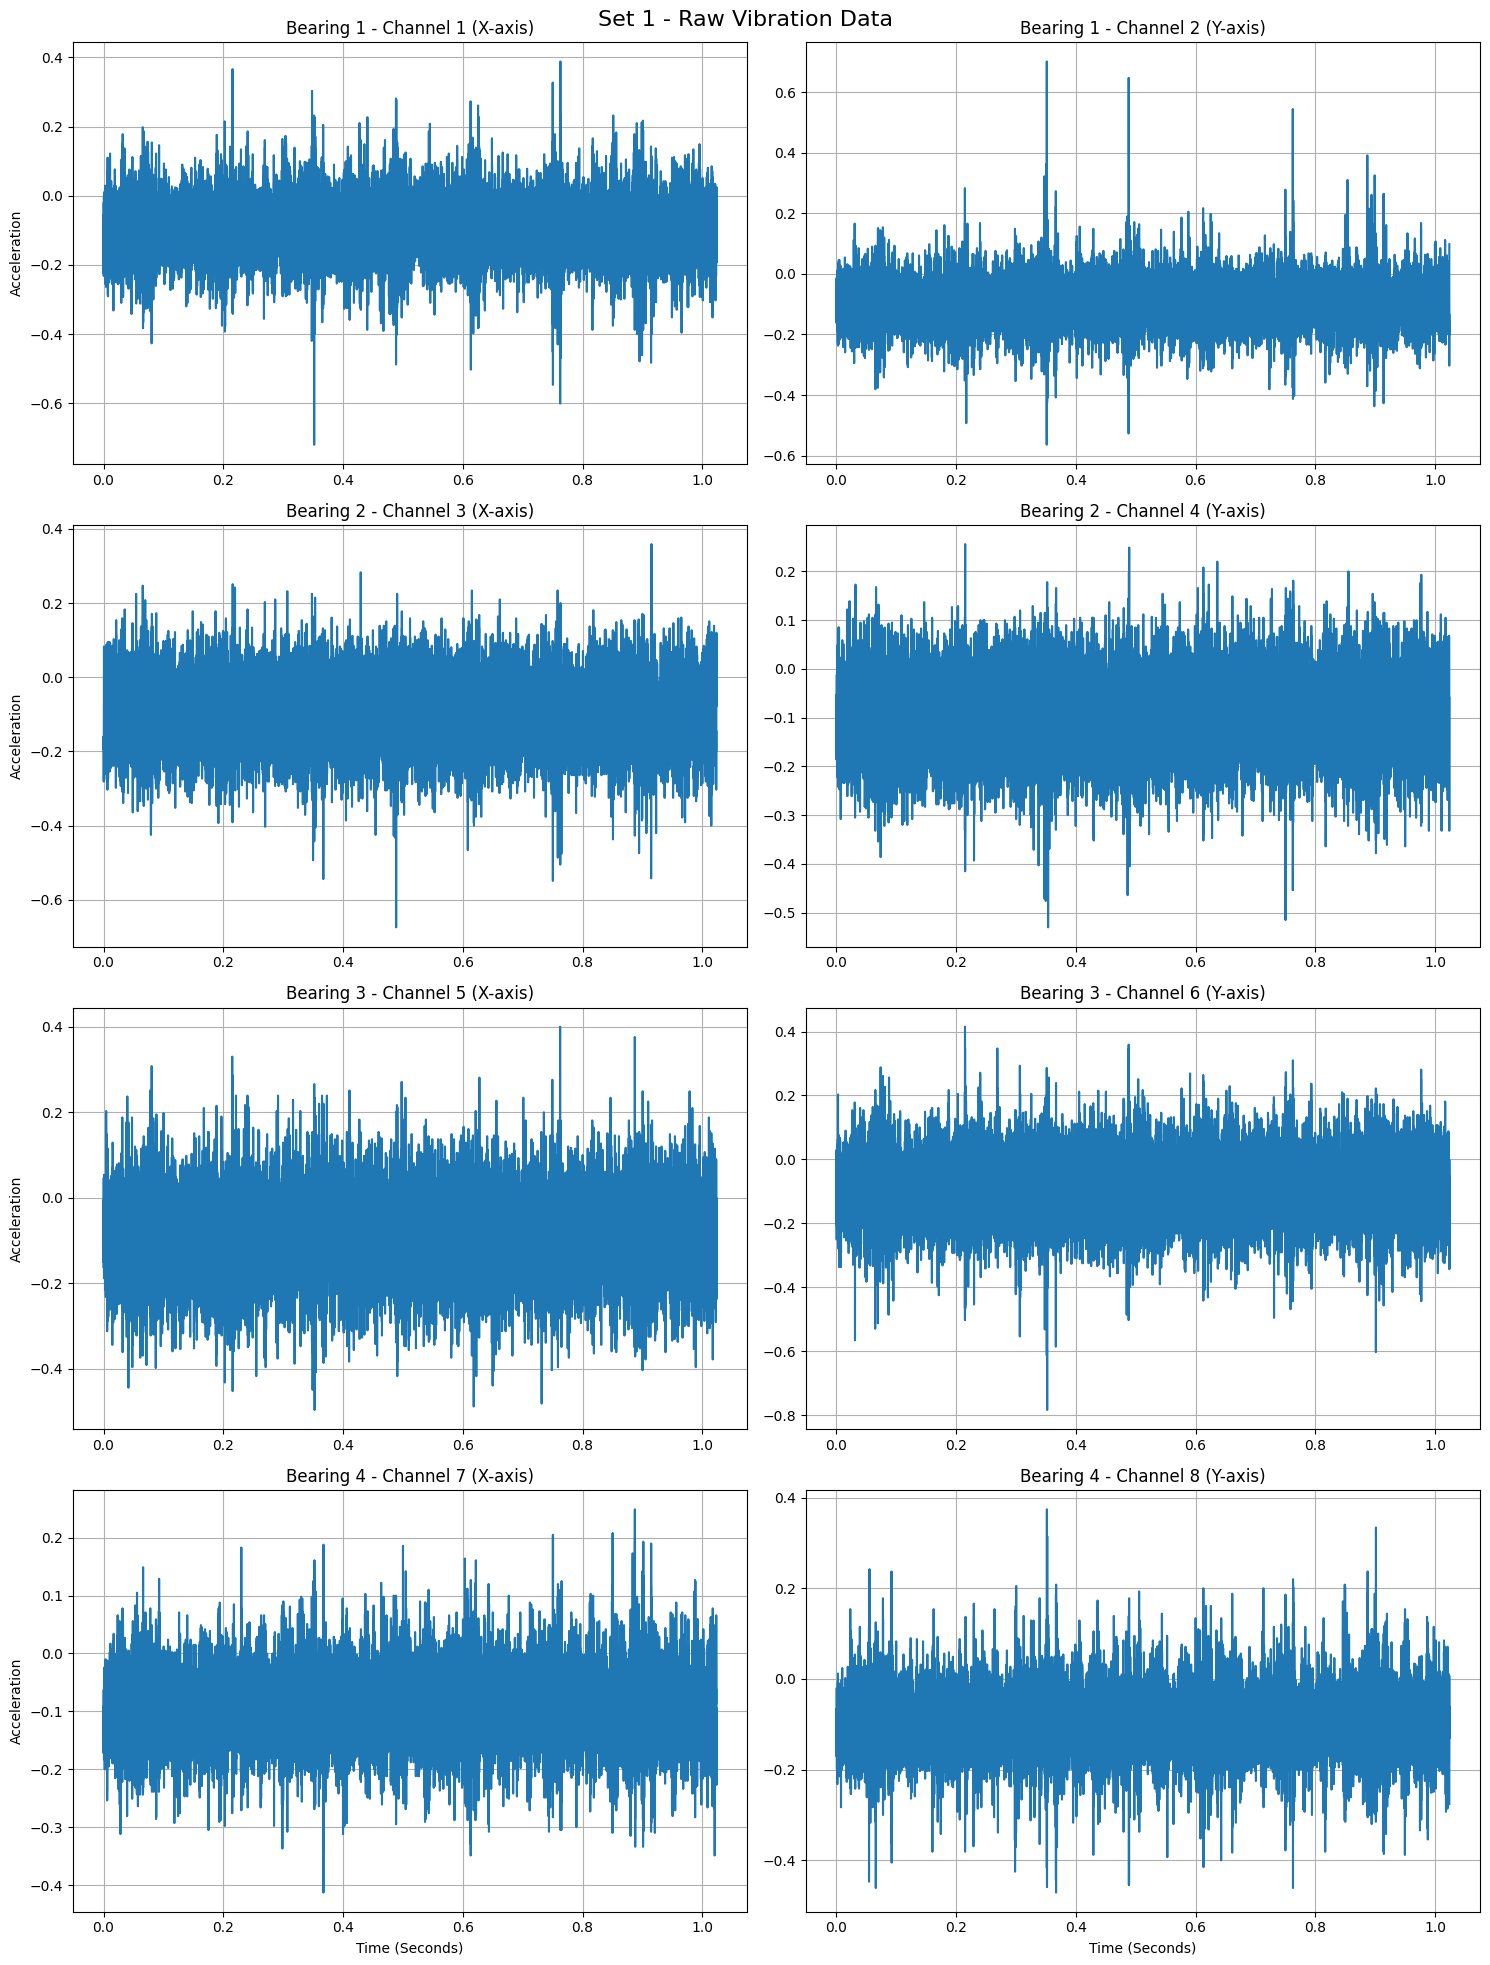

In [38]:
# Create time array for x-axis (The data you have is recorded at Sampling Rate = 20,480 Hz (meaning 20,480 points per second).
time = create_time(len(raw_data_1))

plt.figure(figsize=(15, 20))  # Overall shape size

# Create for loop to plot all 4 bearing channels
# We have 4 Bearings x 2 Channels = 8 Subplots
for bearing in range(4):           # bearings (0→3)
    for channel in range(2):       # channels (0,1)
        
        # subplot index (1→8)
        idx = bearing * 2 + channel + 1
        
        # Define subplot in grid (4 rows x 2 columns)
        plt.subplot(4, 2, idx)
        
        # Main title of the whole form
        plt.suptitle('Set 1 - Raw Vibration Data', size=16)
        
        # Draw the raw signal (time vs vibration signal)
        # raw_data_1[:, idx-1] → the appropriate column for each bearing/channel
        plt.plot(time, raw_data_1[:, idx-1])
        
        # Title for each subplot → Specifies which Bearing and which Channel
        plt.title(f"Bearing {bearing+1} - Channel {idx} ({'X' if channel==0 else 'Y'}-axis)")
        
        # Label for the vertical axis (y-axis)
        if channel == 0:
            plt.ylabel("Acceleration")
        
        # Label for the horizontal axis (x-axis) in the last row only
        if bearing == 3:
            plt.xlabel("Time (Seconds)")
        
        # Add a grid to the form to facilitate reading.
        plt.grid(True)

# Improve graphics distribution (so titles don't overlap)
plt.tight_layout()
plt.show()

Close-up of the signal shape

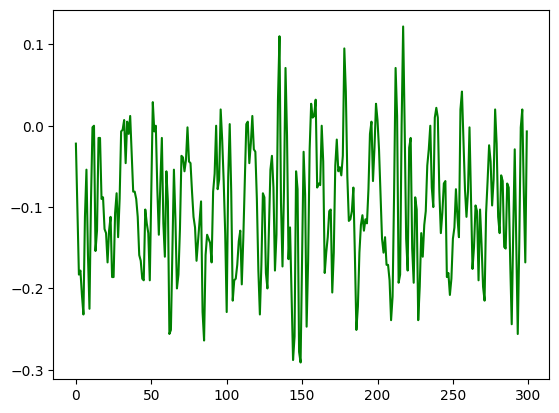

In [39]:
plt.plot(raw_data_1[:300, 0], color='g')
plt.show()

#### **For 2nd set**

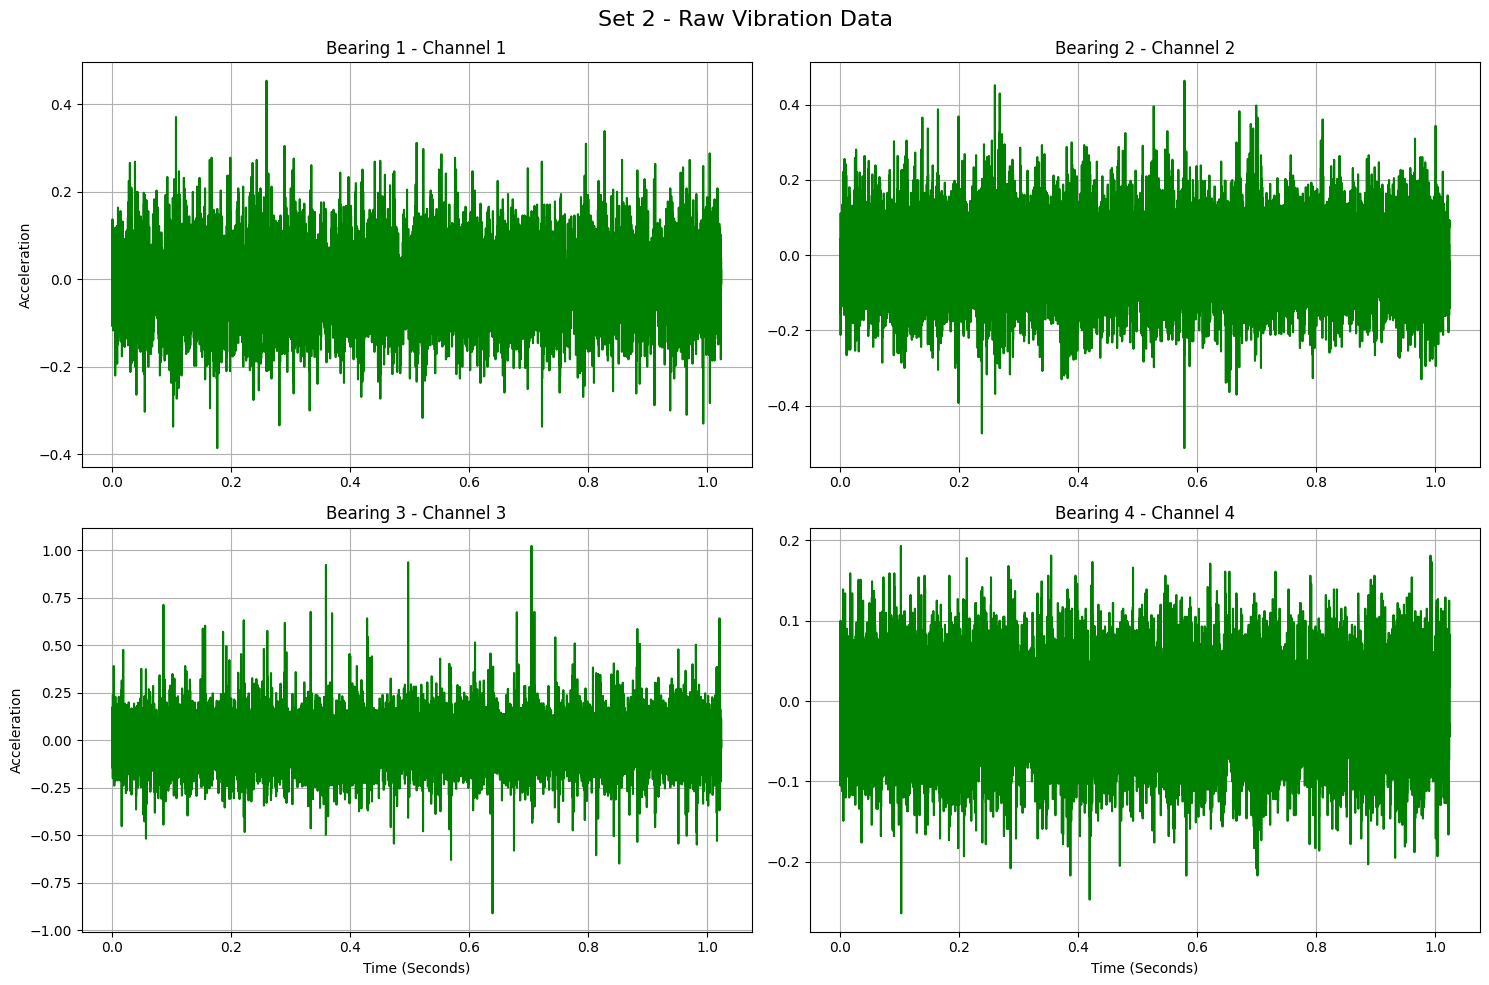

In [40]:
# Create time array for x-axis (The data you have is recorded at Sampling Rate = 20,480 Hz (meaning 20,480 points per second).
time = create_time(len(raw_data_2))

plt.figure(figsize=(15, 10))  # Overall shape size

# Create for loop to plot all 4 bearing channels
for bearing in range(4):          # bearings (0→3)
    
    # Define subplot in grid (2 rows x 2 columns)
    plt.subplot(2, 2, bearing+1)
    
    # Main title of the whole form
    plt.suptitle('Set 2 - Raw Vibration Data', size=16)
    
    # Draw the raw signal (time vs vibration signal)
    # raw_data_2[:, bearing] → the appropriate column for each bearing or channel
    plt.plot(time, raw_data_2[:, bearing], color='g')
    
    # Title for each subplot → Specifies which Bearing and which Channel
    plt.title(f"Bearing {bearing+1} - Channel {bearing+1}")
    
    # Label for the vertical axis (y-axis)
    if bearing == 0 or bearing == 2:
        plt.ylabel("Acceleration")
    
    # Label for the horizontal axis (x-axis) in the last row only
    if bearing == 2 or bearing == 3:
        plt.xlabel("Time (Seconds)")
    
    # Add a grid to the form to facilitate reading.
    plt.grid(True)

# Improve graphics distribution (so titles don't overlap)
plt.tight_layout()
plt.show()

Close-up of the signal shape

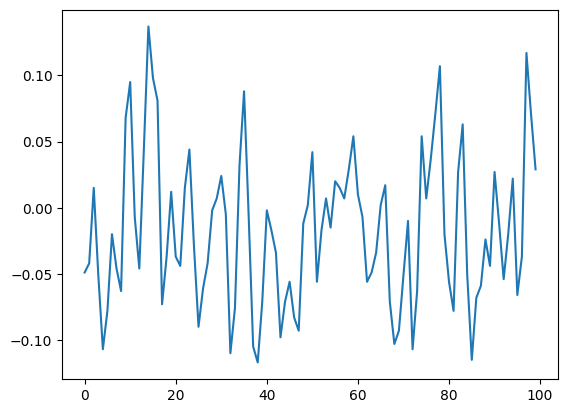

In [41]:
plt.plot(raw_data_2[:100, 0])
plt.show()

#### **For 3rd set**

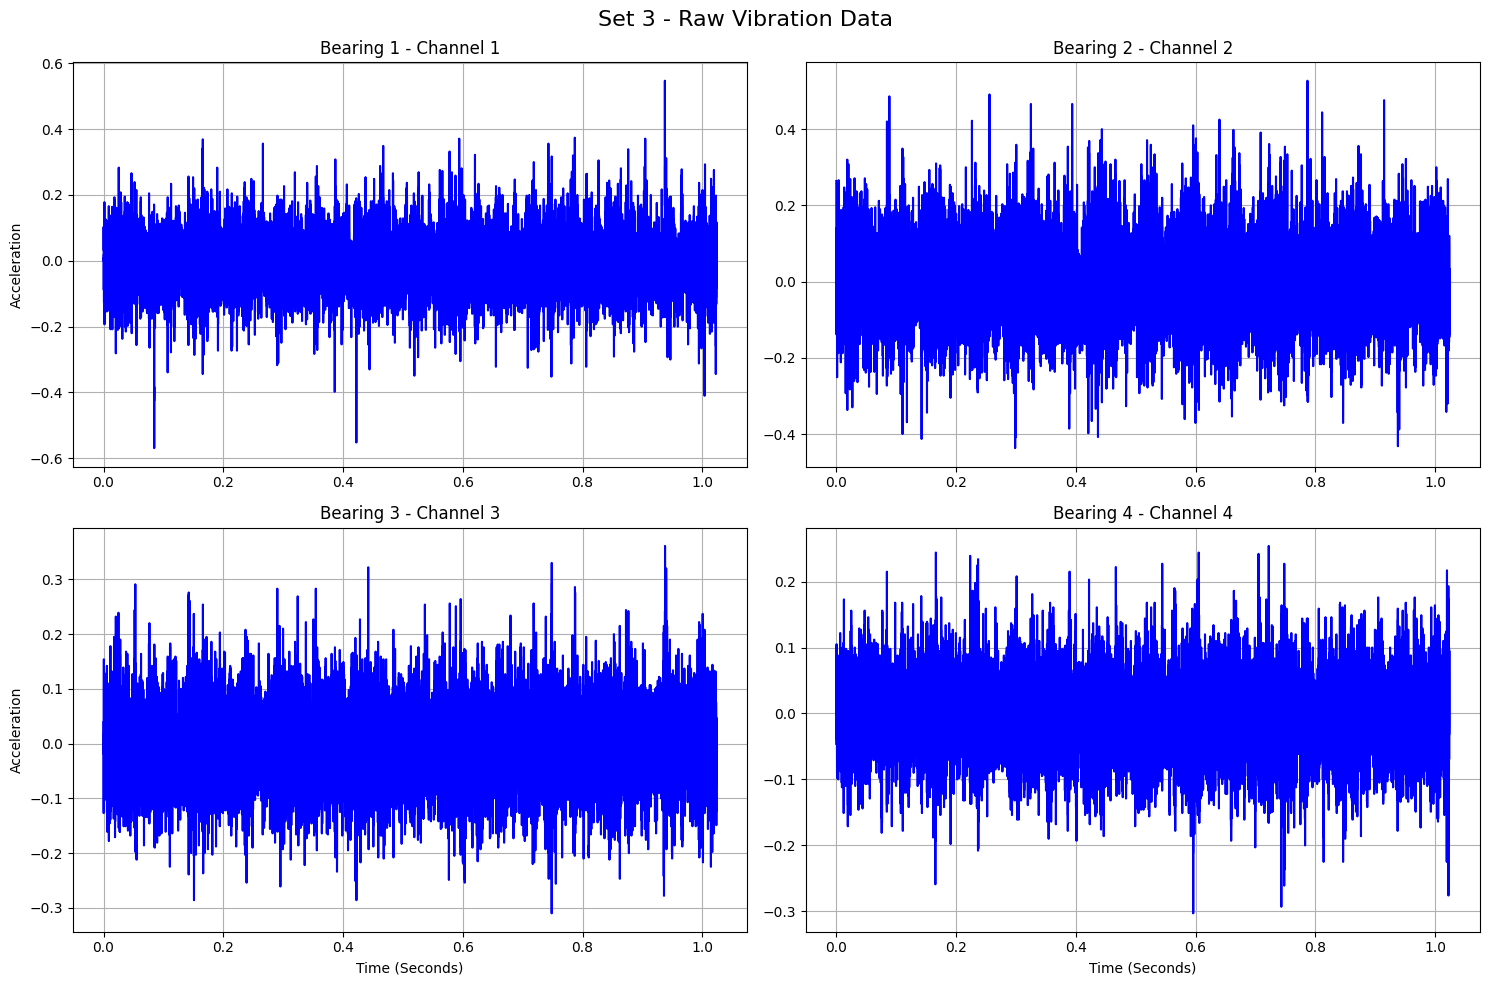

In [42]:
# Create time array for x-axis (The data you have is recorded at Sampling Rate = 20,480 Hz (meaning 20,480 points per second).
time = create_time(len(raw_data_3))

plt.figure(figsize=(15, 10))  # Overall shape size

# Create for loop to plot all 4 bearing channels
for bearing in range(4):       # bearings (0→3)
    
    # Define subplot in grid (2 rows x 2 columns)
    plt.subplot(2, 2, bearing+1)
    
    # Main title of the whole form
    plt.suptitle('Set 3 - Raw Vibration Data', size=16)
    
    # Draw the raw signal (time vs vibration signal)
    # raw_data_3[:, bearing] → the appropriate column for each bearing or channel
    plt.plot(time, raw_data_3[:, bearing], color='blue')
    
    # Title for each subplot → Specifies which Bearing and which Channel
    plt.title(f"Bearing {bearing+1} - Channel {bearing+1}")
    
    # Label for the vertical axis (y-axis)
    if bearing == 0 or bearing == 2:
        plt.ylabel("Acceleration")
    
    # Label for the horizontal axis (x-axis) in the last row only
    if bearing == 2 or bearing == 3:
        plt.xlabel("Time (Seconds)")
    
    # Add a grid to the form to facilitate reading.
    plt.grid(True)

# Improve graphics distribution (so titles don't overlap)
plt.tight_layout()
plt.show()

### **2.4 Time Domain Features (Basic Statistical and Data Analysis)**

In this subsection, we focus on extracting **Time Domain Features** from the raw vibration data to analyze the signal in its original form (vibration versus time) and understand the characteristics of each channel.  

#### **`get_bearing_time_domain(raw_data)`**

This function calculates **Time Domain Metrics** for each channel in datasets:

- **Mean**: The average value of the data in each channel.

  $$
  \text{Mean} = \frac{1}{N} \sum_{i=1}^{N} x_i
  $$

- **Standard Deviation (std)**: A measure of the spread of the data.

  $$
  \sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
  $$

- **Max**: The maximum value in the channel's data.

  $$
  \text{Max} = \max(x_i)
  $$

- **Min**: The minimum value in the channel's data.

  $$
  \text{Min} = \min(x_i)
  $$

- **Root Mean Square (RMS)**: The square root of the average of the squared values, which gives a measure of the signal's magnitude.

  $$
  \text{RMS} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} x_i^2}
  $$

- **Peak-to-Peak**: The difference between the maximum and minimum values, representing the full range of values in the data.

  $$
  \text{P2P} = \max(x_i) - \min(x_i)
  $$

Tha output of this function will be:

`{'Channel_1': {'mean': np.float64(-0.09459287109375),
  'std': np.float64(0.08112208481351546),
  'max': np.float64(0.388),
  'min': np.float64(-0.72),
  'rms': np.float64(0.12461381908219489),
  'peak_to_peak': np.float64(1.108)}`

In [43]:
def get_bearing_time_domain(raw_data):
    
    # dictionary to store calculated features for each channel
    stats_dict = {}
    
    # get number of columns or number of channel
    # ex: (20480, 4) .shape[1] ==> to get number of bearings or channels
    num_channels = raw_data.shape[1]
    
    # Loop over each channel in the raw vibration data
    for channel in range(num_channels):
        
        # extract data for one channel (all rows of a column)
        channel_data = raw_data[ : ,channel]
        
        # Calculate time-domain statistical features for the current channel
        stats_dict[f'Channel_{channel+1}'] = {
            'mean': np.mean(channel_data),
            'std': np.std(channel_data),
            'max': np.max(channel_data),
            'min': np.min(channel_data),
            'rms': np.sqrt(np.mean(channel_data**2)),
            'peak_to_peak': np.max(channel_data) - np.min(channel_data)
        }
    
    # Return dictionary containing features for all channels
    return stats_dict

#### **`process_bearing_files(data_path, save_csv=True, csv_name="bearing_time_domain_features.csv")`**

This function processes all the files in a given directory (dataset folder). It does the following:

- Iterates through all files in the dataset folder.
- Loads the raw data from each file.
- Calls `get_bearing_statistics` to compute the statistics for each dataset.
- Returns **DataFrame** a table where **each row represents a file**, and the columns are the calculated statistical features.

In [44]:
def process_bearing_files(data_path, save_csv=True, csv_name="bearings_time_domain_features.csv"):
    
    # Containing the full paths to all files in the dataset folder.
    files = sorted(data_path.glob('*'))
    
    all_file_stats = []
    
    for file in files:
        
        # Load all of raw vibration data for each file
        raw_data = np.loadtxt(file)
        
        # Apply 'get_bearing_time_domain' function to all data point
        # Compute and return the statistics for each dataset as dict.
        stats = get_bearing_time_domain(raw_data)
        
        # Start building a row for our final table for THIS file
        # First, add the filename (without the .txt extension)
        row_for_this_file = {"File_Name" : file.stem}
        
        # Flatten the nested statistics dictionary into a single row
        # For each channel (e.g., 'Channel_1') and its features...
        for channel_name, features in stats.items():
            
            # For each feature (e.g., 'mean', 'max') and its value...
            for feature_name, value in features.items():
                
                # Create a combined column name, like "Channel_1_mean"
                combined_column_name = f"{channel_name}_{feature_name}"
                
                # Add the value to our row for this file
                row_for_this_file[combined_column_name] = value
                
        # Add the complete row for this file to our main list
        all_file_stats.append(row_for_this_file)
        
        # Convert the list of rows into a pandas DataFrame (as table)
        final_dataframe = pd.DataFrame(all_file_stats)
        
    # Save as CSV (optional)
    if save_csv:
        final_dataframe.to_csv(csv_name, index=False)
        print(f"Saved results to {csv_name}")
    
    print(f"Processed {len(files)} files from {data_path}")
    
    return final_dataframe

In [45]:
# df_1 = process_bearing_files(data_path_1, csv_name="bearings_time_domain_features_1.csv")
# df_2 = process_bearing_files(data_path_2, csv_name="bearings_time_domain_features_2.csv")
# df_3 = process_bearing_files(data_path_3, csv_name="bearings_time_domain_features_3.csv")

df_1 = pd.read_csv(r"E:\Omar\Courses\AMIT-main\Projects\ML Final Project\Code varsions\bearings_time_domain_features_1.csv")
df_2 = pd.read_csv(r"E:\Omar\Courses\AMIT-main\Projects\ML Final Project\Code varsions\bearings_time_domain_features_2.csv")
df_3 = pd.read_csv(r"E:\Omar\Courses\AMIT-main\Projects\ML Final Project\Code varsions\bearings_time_domain_features_3.csv")

**Output**

- Saved results to bearings_time_domain_1.csv
    - Processed 2156 files from E:\.....\ML\Final Machine Learning Project\datasets\1st_test
- Saved results to bearings_time_domain_2.csv
    - Processed 984 files from E:\.....\ML\Final Machine Learning Project\datasets\2nd_test
- Saved results to bearings_time_domain_3.csv
    - Processed 6324 files from E:\.....\ML\Final Machine Learning Project\datasets\3nd_test

### **2.5 Visualise for Time Domain Fetures**

The following table summarizes the most common statistical features extracted from vibration signals in the time domain. These features are widely used in condition monitoring and predictive maintenance for rotating machinery, especially bearings.


| Feature                           | Description                                      | Importance in Vibration Analysis                                                                 |
| --------------------------------- | ------------------------------------------------ | ----------------------------------------------------------------------------------------------- |
| **Maximum / Minimum**             | The highest and lowest values in the signal      | Indicate the extreme vibration levels → very high values may suggest a mechanical defect.        |
| **Mean**                          | Average value of the signal                      | Shows if the signal is centered around zero or has a bias (offset).                             |
| **Standard Deviation** | Measure of variability                           | High values → large fluctuations in the signal (possible fault).                                |
| **RMS (Root Mean Square)**        | Measure of signal strength/energy                | Most important feature in vibration analysis as it reflects total vibration energy. Increases as bearing faults develop. |           |
| **Peak-to-Peak**                  | Difference between max and min values            | Represents the total range of vibration. Indicates overall amplitude variation.                 |


#### **Set 1** (`df_1`)

- **RMS**

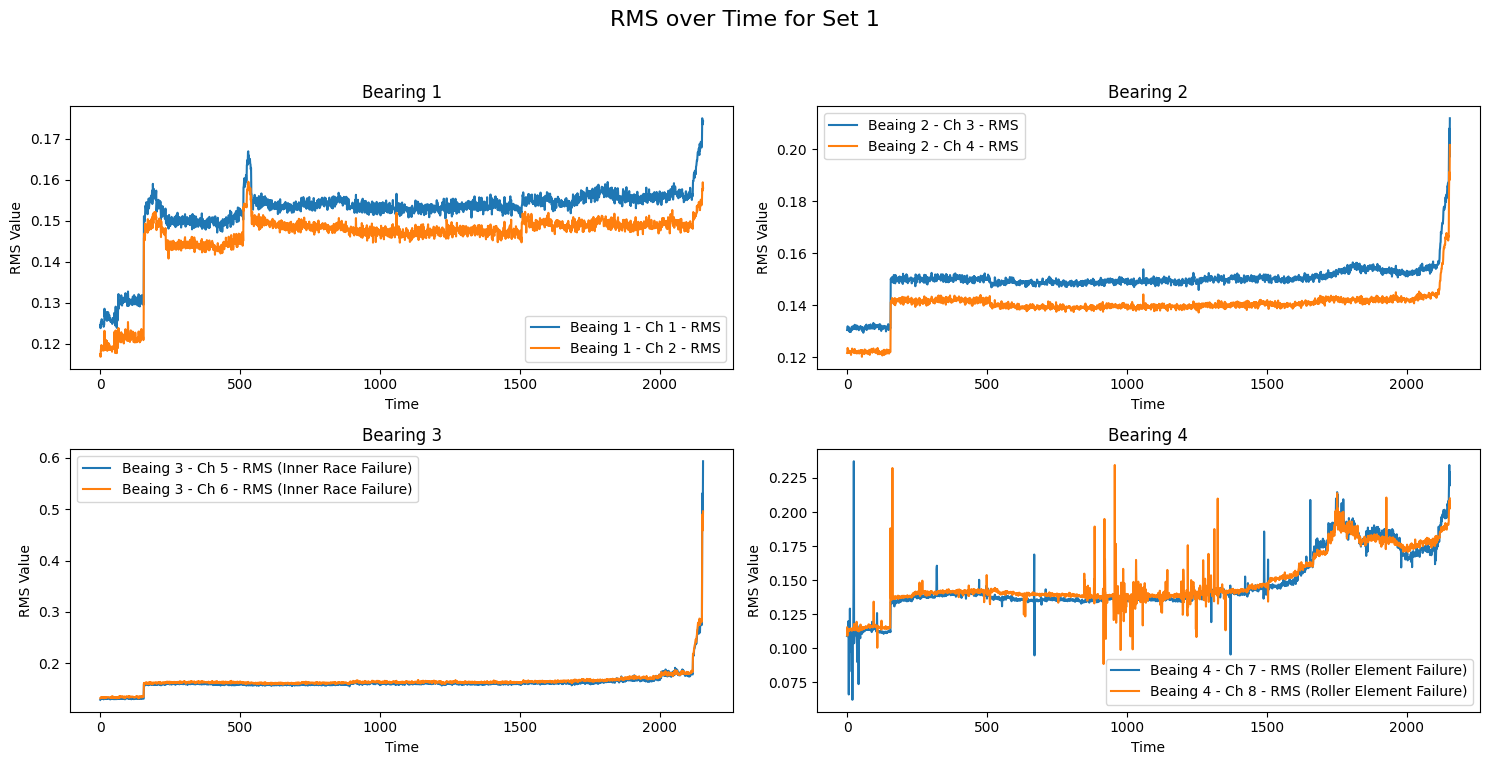

In [47]:
plt.figure(figsize=(15, 8))

# ----------- RMS -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_1_rms'], label='Beaing 1 - Ch 1 - RMS')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_2_rms'], label='Beaing 1 - Ch 2 - RMS')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_3_rms'], label='Beaing 2 - Ch 3 - RMS')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_4_rms'], label='Beaing 2 - Ch 4 - RMS')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_5_rms'], label='Beaing 3 - Ch 5 - RMS (Inner Race Failure)')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_6_rms'], label='Beaing 3 - Ch 6 - RMS (Inner Race Failure)')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_7_rms'], label='Beaing 4 - Ch 7 - RMS (Roller Element Failure)')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_8_rms'], label='Beaing 4 - Ch 8 - RMS (Roller Element Failure)')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.suptitle("RMS over Time for Set 1", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- **Standard Deviation**

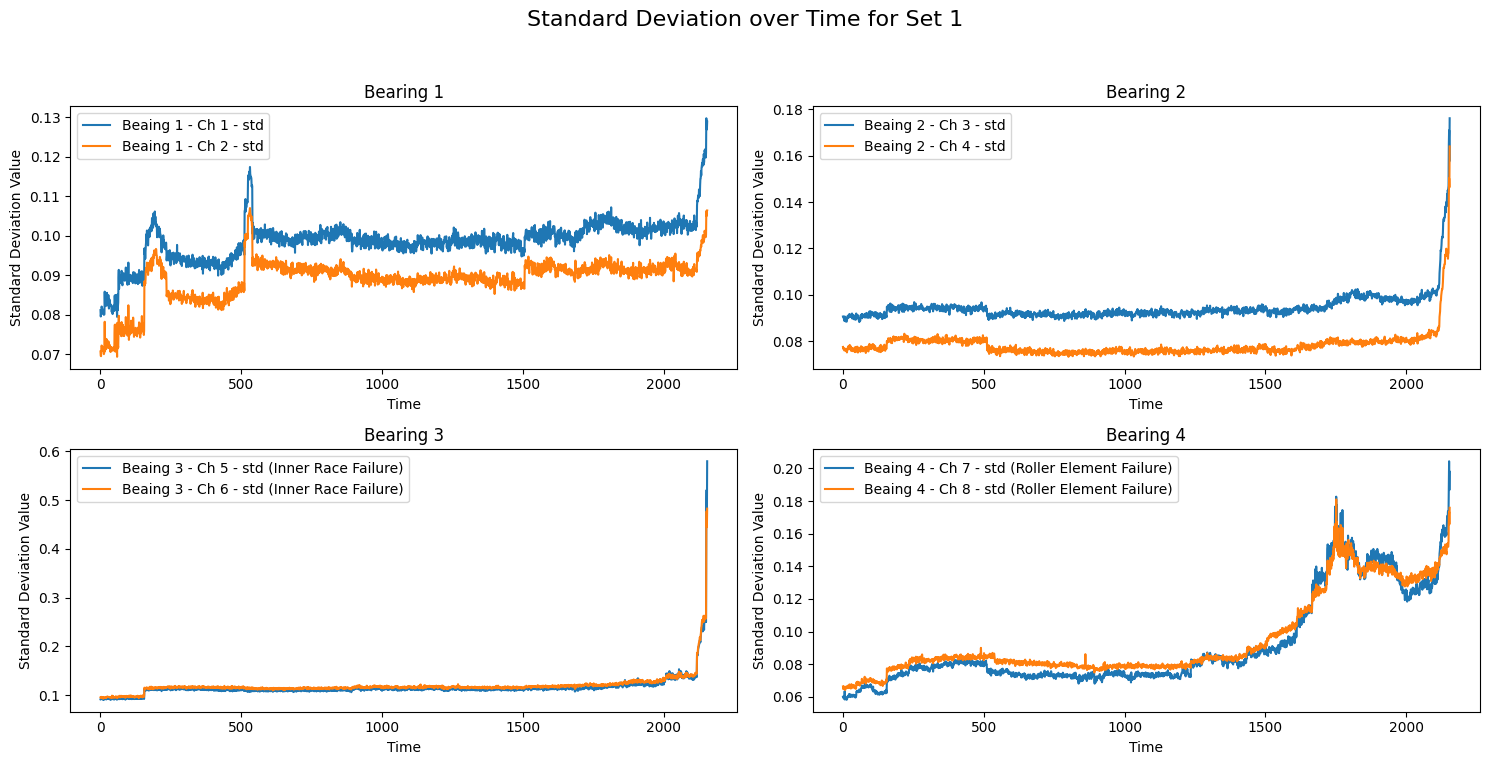

In [48]:
plt.figure(figsize=(15, 8))

# ----------- Standard Deviation -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_1_std'], label='Beaing 1 - Ch 1 - std')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_2_std'], label='Beaing 1 - Ch 2 - std')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()


plt.subplot(2, 2, 2)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_3_std'], label='Beaing 2 - Ch 3 - std')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_4_std'], label='Beaing 2 - Ch 4 - std')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()


plt.subplot(2, 2, 3)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_5_std'], label='Beaing 3 - Ch 5 - std (Inner Race Failure)')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_6_std'], label='Beaing 3 - Ch 6 - std (Inner Race Failure)')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()


plt.subplot(2, 2, 4)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_7_std'], label='Beaing 4 - Ch 7 - std (Roller Element Failure)')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_8_std'], label='Beaing 4 - Ch 8 - std (Roller Element Failure)')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()


plt.suptitle("Standard Deviation over Time for Set 1", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- **Peak to Peak**

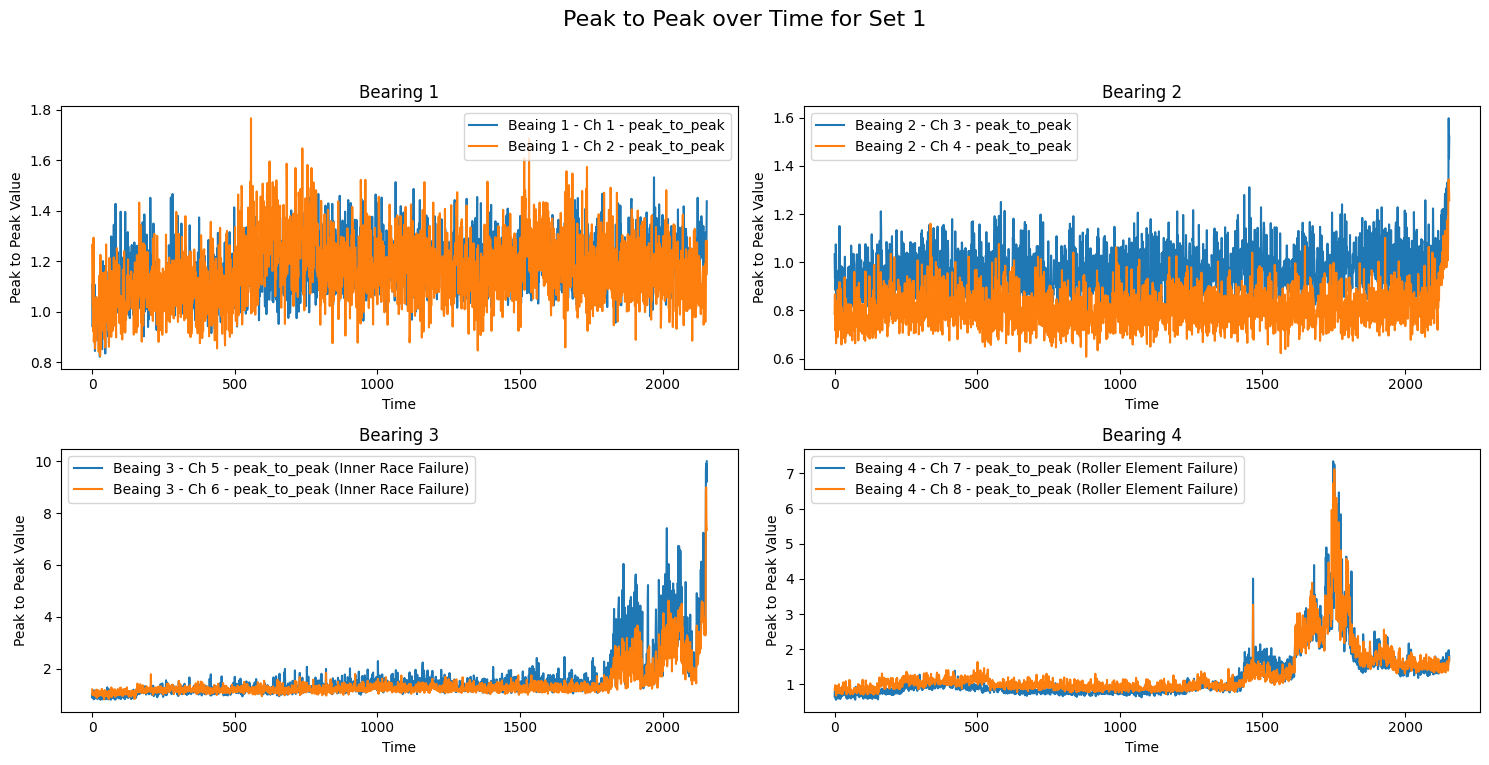

In [49]:
plt.figure(figsize=(15, 8))

# ----------- Peak to Peak -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_1_peak_to_peak'], label='Beaing 1 - Ch 1 - peak_to_peak')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_2_peak_to_peak'], label='Beaing 1 - Ch 2 - peak_to_peak')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()


plt.subplot(2, 2, 2)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_3_peak_to_peak'], label='Beaing 2 - Ch 3 - peak_to_peak')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_4_peak_to_peak'], label='Beaing 2 - Ch 4 - peak_to_peak')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_5_peak_to_peak'], label='Beaing 3 - Ch 5 - peak_to_peak (Inner Race Failure)')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_6_peak_to_peak'], label='Beaing 3 - Ch 6 - peak_to_peak (Inner Race Failure)')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_7_peak_to_peak'], label='Beaing 4 - Ch 7 - peak_to_peak (Roller Element Failure)')
sns.lineplot(df_1, x=df_1.index, y=df_1['Channel_8_peak_to_peak'], label='Beaing 4 - Ch 8 - peak_to_peak (Roller Element Failure)')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.suptitle("Peak to Peak over Time for Set 1", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### **Set 2** (`df_2`)

- **RMS**

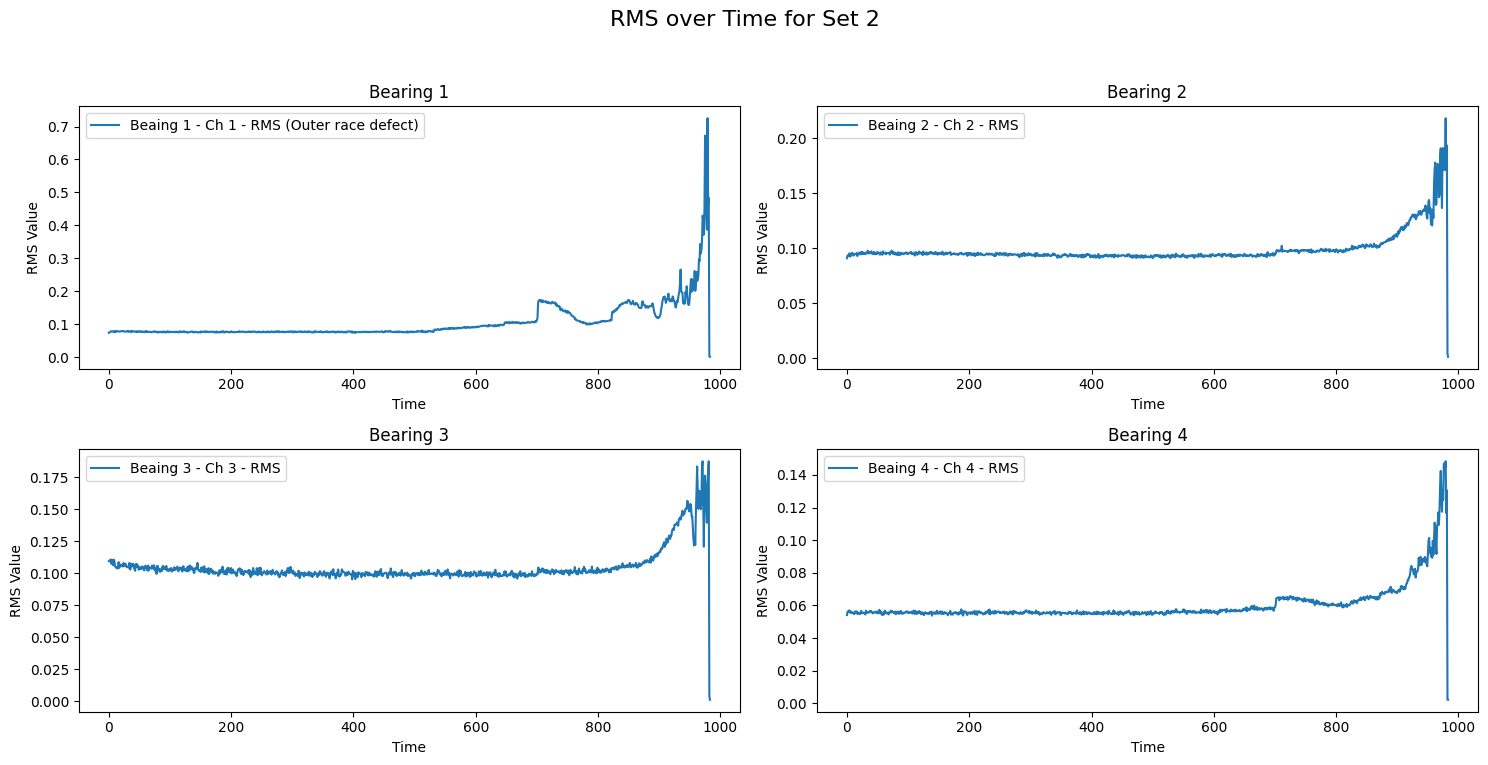

In [50]:
plt.figure(figsize=(15, 8))

# ----------- RMS -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_1_rms'], label='Beaing 1 - Ch 1 - RMS (Outer race defect)')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_2_rms'], label='Beaing 2 - Ch 2 - RMS')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_3_rms'], label='Beaing 3 - Ch 3 - RMS')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_4_rms'], label='Beaing 4 - Ch 4 - RMS')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.suptitle("RMS over Time for Set 2", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- **Standard Deviation**

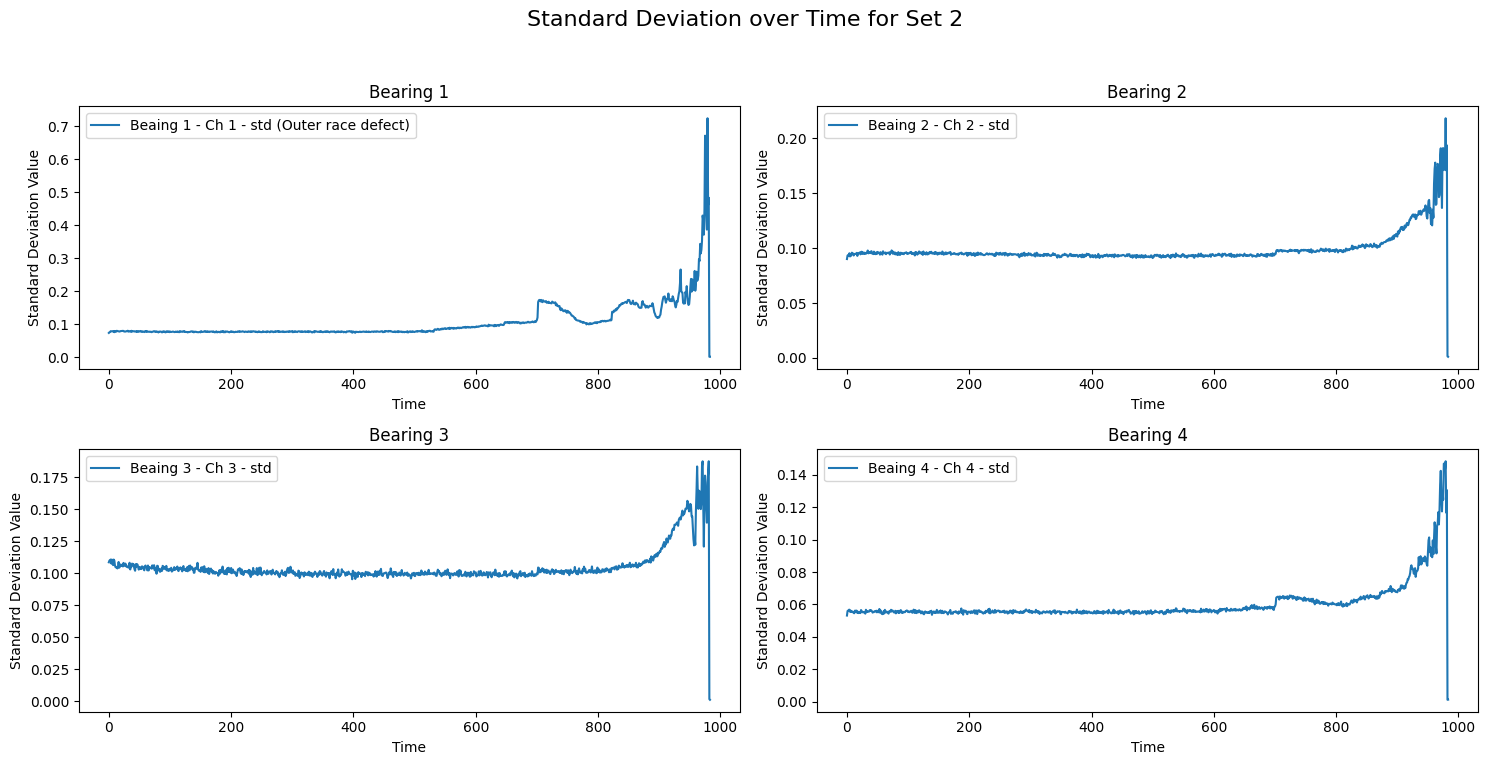

In [51]:
plt.figure(figsize=(15, 8))

# ----------- Standard Deviation -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_1_std'], label='Beaing 1 - Ch 1 - std (Outer race defect)')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_2_std'], label='Beaing 2 - Ch 2 - std')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_3_std'], label='Beaing 3 - Ch 3 - std')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_4_std'], label='Beaing 4 - Ch 4 - std')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.suptitle("Standard Deviation over Time for Set 2", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- **Peak to Peak**

In [52]:
df_2.columns

Index(['File_Name', 'Channel_1_mean', 'Channel_1_std', 'Channel_1_max',
       'Channel_1_min', 'Channel_1_rms', 'Channel_1_peak_to_peak',
       'Channel_2_mean', 'Channel_2_std', 'Channel_2_max', 'Channel_2_min',
       'Channel_2_rms', 'Channel_2_peak_to_peak', 'Channel_3_mean',
       'Channel_3_std', 'Channel_3_max', 'Channel_3_min', 'Channel_3_rms',
       'Channel_3_peak_to_peak', 'Channel_4_mean', 'Channel_4_std',
       'Channel_4_max', 'Channel_4_min', 'Channel_4_rms',
       'Channel_4_peak_to_peak'],
      dtype='object')

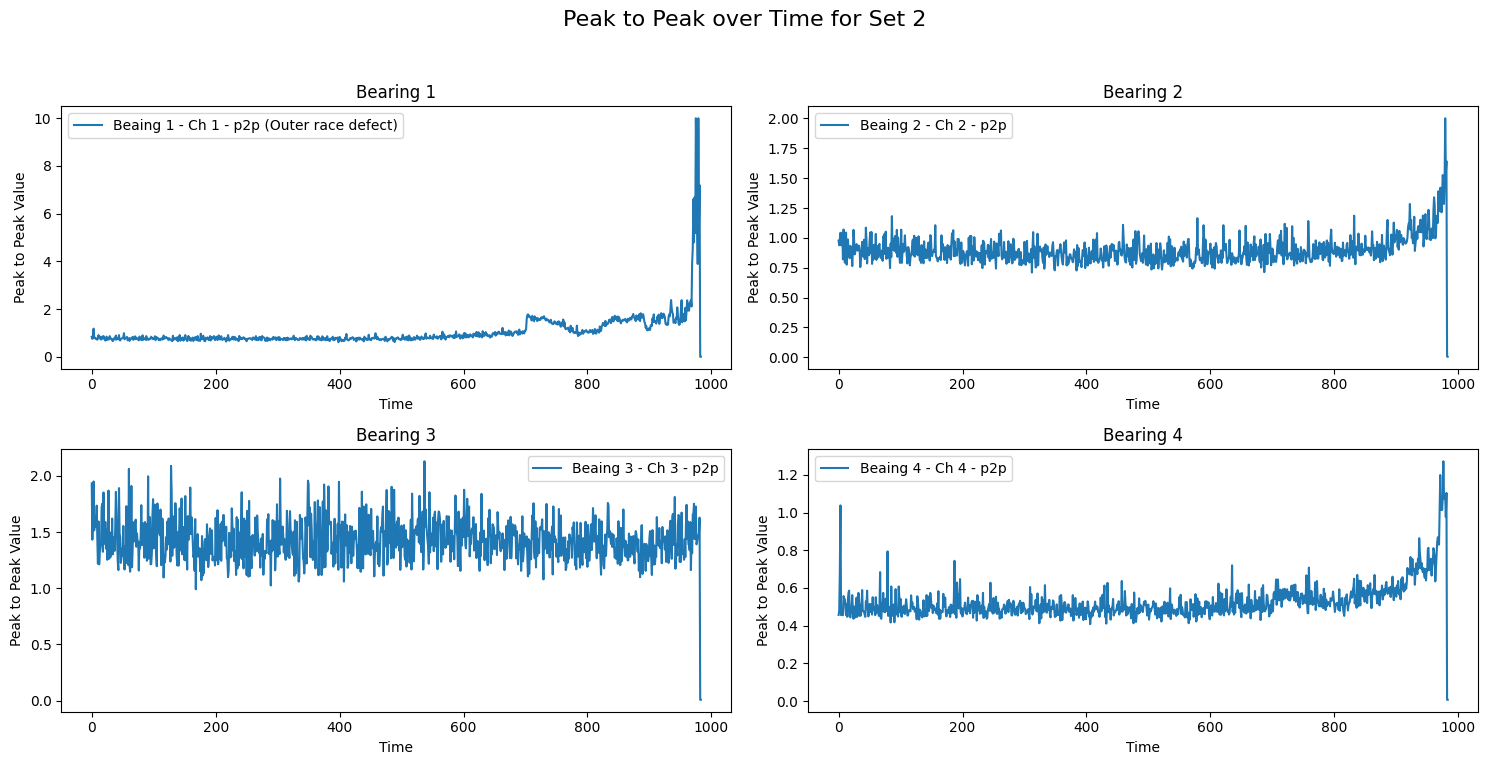

In [53]:
plt.figure(figsize=(15, 8))

# ----------- Peak to Peak -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_1_peak_to_peak'], label='Beaing 1 - Ch 1 - p2p (Outer race defect)')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_2_peak_to_peak'], label='Beaing 2 - Ch 2 - p2p')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_3_peak_to_peak'], label='Beaing 3 - Ch 3 - p2p')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_2, x=df_2.index, y=df_2['Channel_4_peak_to_peak'], label='Beaing 4 - Ch 4 - p2p')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.suptitle("Peak to Peak over Time for Set 2", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### **Set 3** (`df_3`)

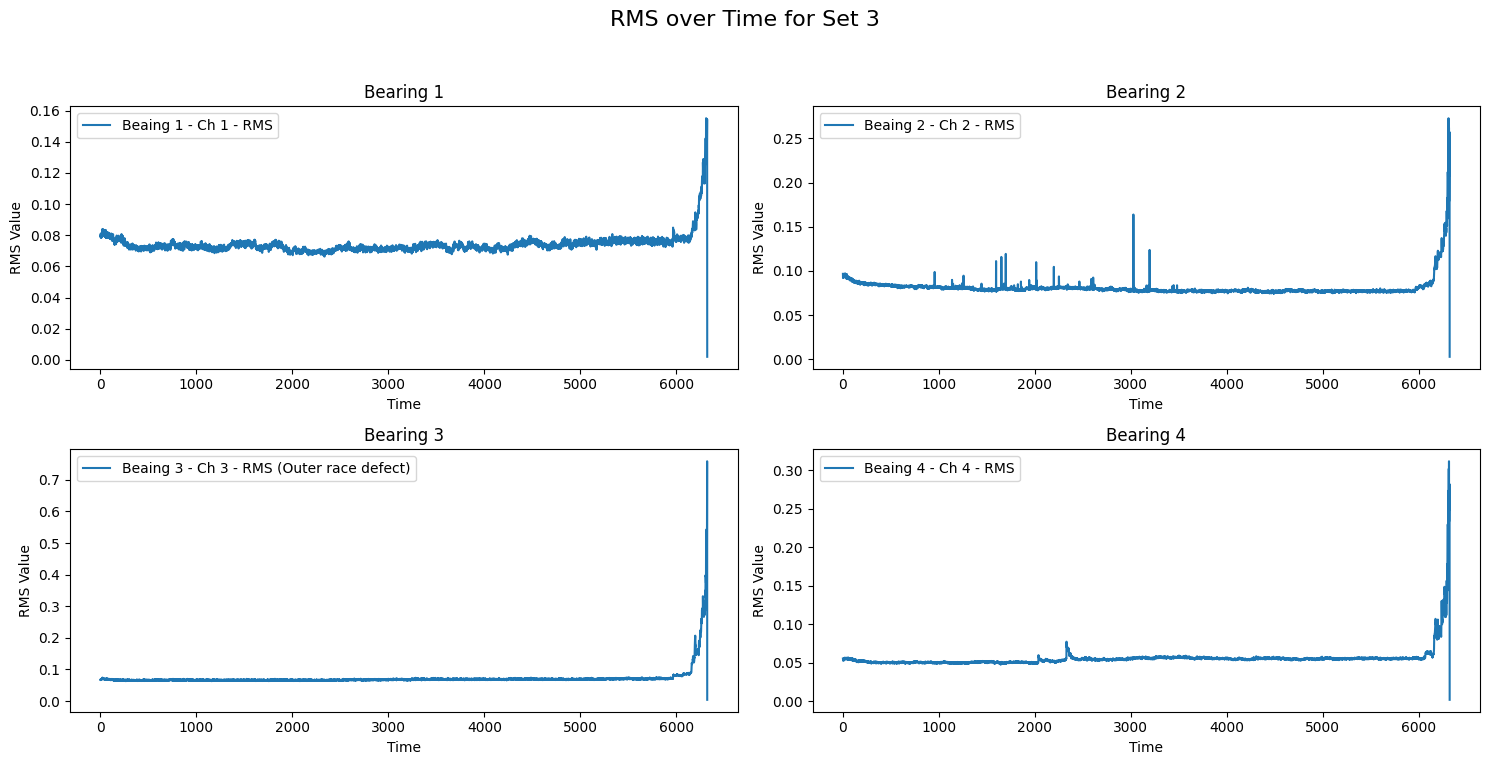

In [54]:
plt.figure(figsize=(15, 8))

# ----------- RMS -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_1_rms'], label='Beaing 1 - Ch 1 - RMS')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_2_rms'], label='Beaing 2 - Ch 2 - RMS')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_3_rms'], label='Beaing 3 - Ch 3 - RMS (Outer race defect)')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_4_rms'], label='Beaing 4 - Ch 4 - RMS')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("RMS Value")
plt.legend()

plt.suptitle("RMS over Time for Set 3", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


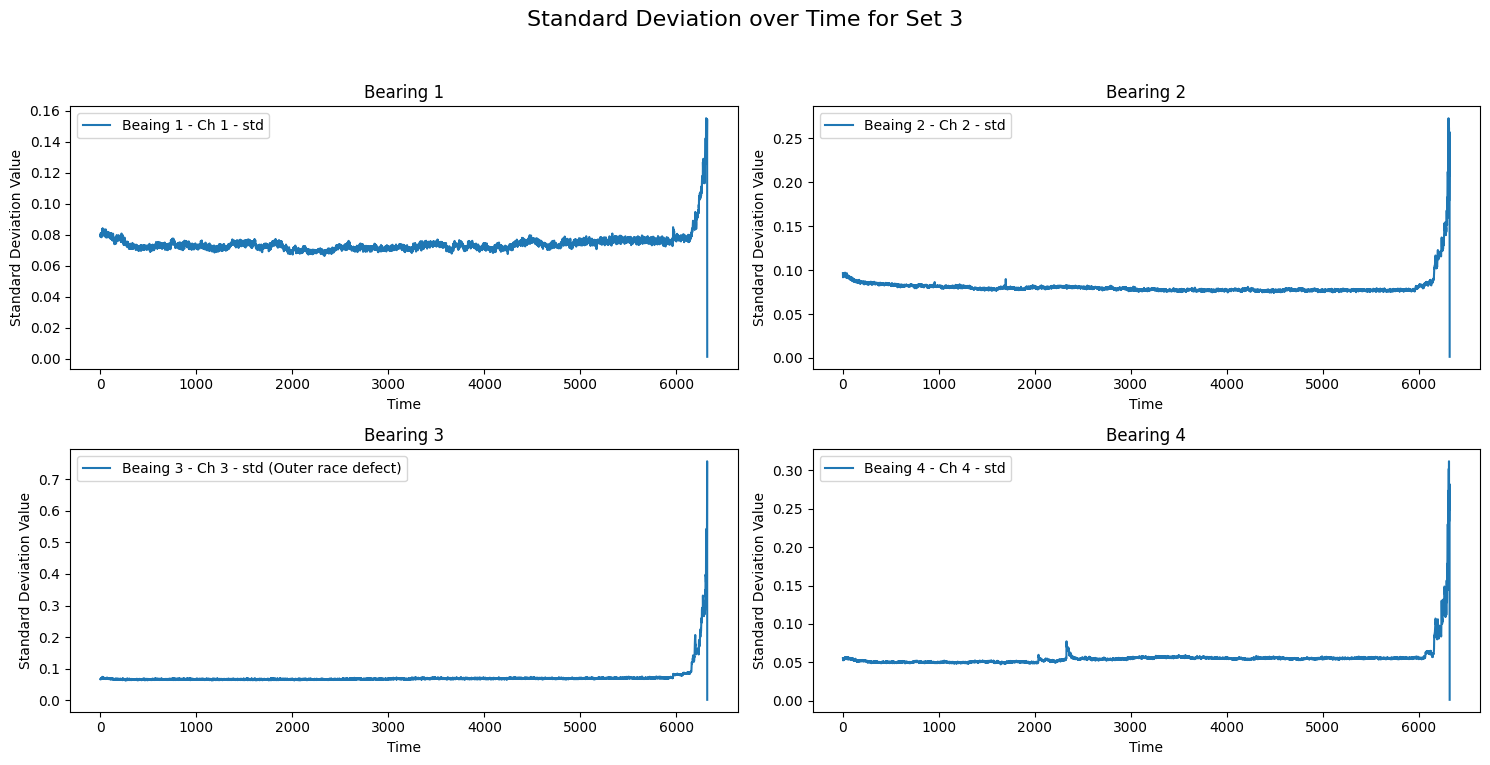

In [55]:
plt.figure(figsize=(15, 8))

# ----------- Standard Deviation -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_1_std'], label='Beaing 1 - Ch 1 - std')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_2_std'], label='Beaing 2 - Ch 2 - std')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_3_std'], label='Beaing 3 - Ch 3 - std (Outer race defect)')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_4_std'], label='Beaing 4 - Ch 4 - std')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("Standard Deviation Value")
plt.legend()

plt.suptitle("Standard Deviation over Time for Set 3", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- **Peak to Peak**

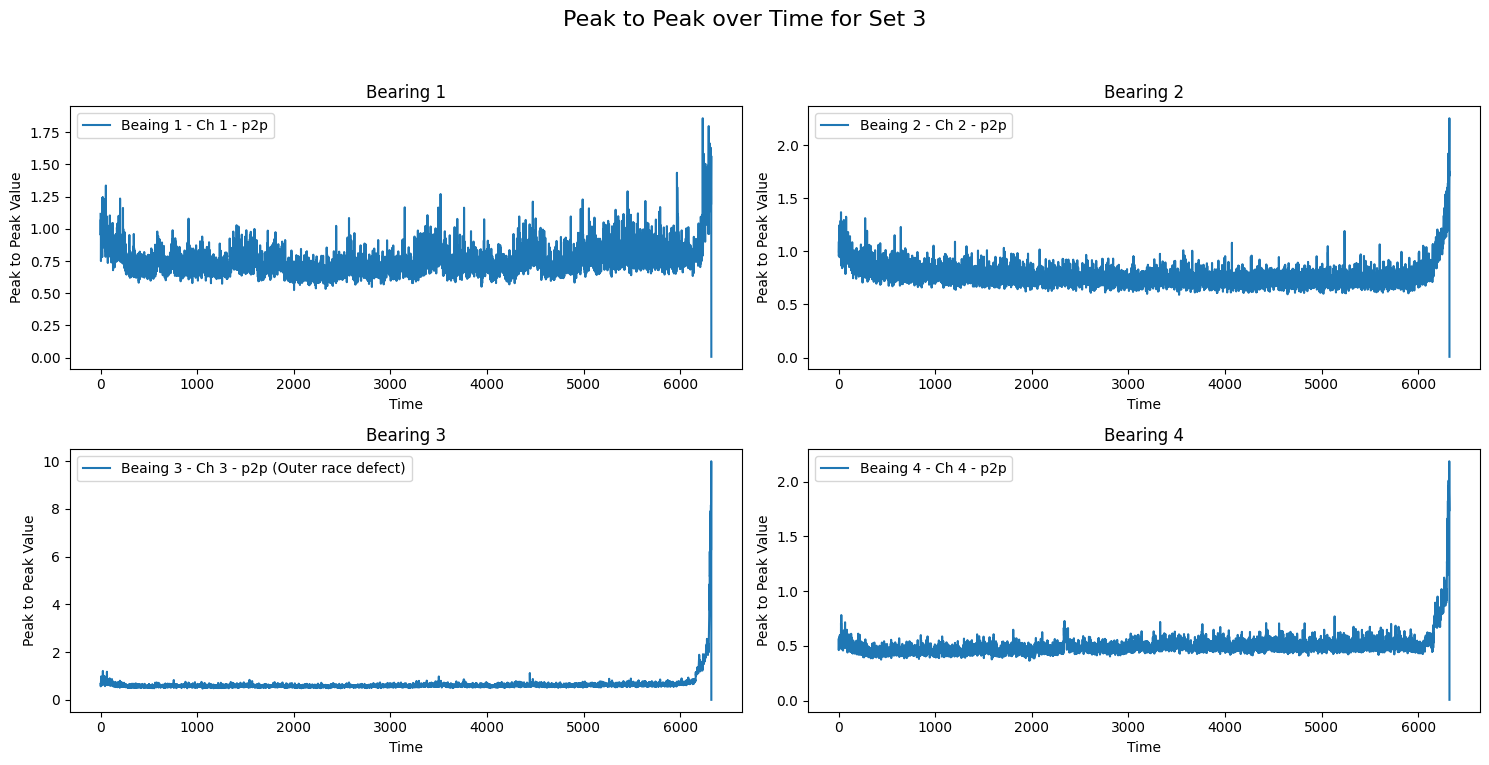

In [56]:
plt.figure(figsize=(15, 8))

# ----------- Peak to Peak -------------
plt.subplot(2, 2, 1)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_1_peak_to_peak'], label='Beaing 1 - Ch 1 - p2p')
plt.title("Bearing 1")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 2)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_2_peak_to_peak'], label='Beaing 2 - Ch 2 - p2p')
plt.title("Bearing 2")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 3)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_3_peak_to_peak'], label='Beaing 3 - Ch 3 - p2p (Outer race defect)')
plt.title("Bearing 3")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.subplot(2, 2, 4)
sns.lineplot(df_3, x=df_3.index, y=df_3['Channel_4_peak_to_peak'], label='Beaing 4 - Ch 4 - p2p')
plt.title("Bearing 4")
plt.xlabel("Time")
plt.ylabel("Peak to Peak Value")
plt.legend()

plt.suptitle("Peak to Peak over Time for Set 3", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### **2.6 Analyzing Bearing Health Over Time**

This section focuses on analyzing bearing health over time using various metrics derived from vibration data, including RMS (Root Mean Square) and Peak-to-Peak values. We calculate these metrics throughout the bearing's lifecycle to track health progression and identify failure patterns.


#### Functions Overview

##### 1. `analyze_all_bearings(statistics, set_num)`
   * Performs comprehensive analysis of all bearings in a dataset
   * Calculates **baseline** metrics from first 100 measurements
   * Compares **baseline** to **final** metrics (**last 10% of data**)
   * Identifies significant changes in RMS and Peak-to-Peak values
   * Handles different channel configurations for each dataset:
     - Set 1 ==> Two channels per bearing
     - Sets 2 & 3 ==> One channel per bearing

In [57]:
def analyze_all_bearings(df, set_num):
    
    print(f"\n========== Analysis for set {set_num} ===============")
    
    # Number of bearings in each set
    num_bearings = 4
    
    failed_bearings = {
        1 : [3, 4],    # Set 1: beaing 3, 4
        2 : [1],       # Set 2: beaing 1
        3 : [3]        # Set 3: beaing 3
    }
    
    for bearing_num in range(1, num_bearings + 1):
        
        if set_num == 1:
            channel = [2 * bearing_num - 1, 2 * bearing_num]   # 2 channel per one bearing
        else:
            channel = [bearing_num]  # 1 channel per bearing
        
        # The mean is to unify the format and solve the multi-channel problem in set 1.
        rms = df[[f'Channel_{ch}_rms' for ch in channel]].mean(axis=1)
        std = df[[f'Channel_{ch}_std' for ch in channel]].mean(axis=1)
        p2p = df[[f'Channel_{ch}_peak_to_peak' for ch in channel]].mean(axis=1)
        
        # First 100 readings = start of experiment (bearing is still new/healthy).
        # It takes the average of the values ​​that make the beaings healthy.
        baseline_rms = rms.iloc[ : 100].mean()
        baseline_std = std.iloc[ : 100].mean()
        baseline_p2p = p2p.iloc[ : 100].mean()
        
        # Take the highest value (max) from the last period → because it represents the worst case the bearing reached before it broke.
        # If you take the average instead of the max, you might miss the value of the big jump that happens at the end.
        # The last 10% represents the final stage (degradation + failure).
        last_segment = int(len(rms) * 0.1)
        rms_max = rms.iloc[-last_segment : ].max()
        std_max = std.iloc[-last_segment : ].max()
        p2p_max = p2p.iloc[-last_segment : ].max()
        
        # Check: Is this bearing among those that failed in this set or not?
        # Objective: Compare the calculated metrics (RMS, P2P, STD) with the reality (is it actually faulty or not).
        status = "FAILED" if bearing_num in failed_bearings.get(set_num) else "HEALTHY"
        
        # Print all results
        print(f"\nBearing {bearing_num} - {status}")
        print(f"Baseline RMS: {baseline_rms: .4f} | Maximum RMS: {rms_max: .4f} | Increase: {(rms_max / baseline_rms - 1) * 100 :.2f}%")
        print(f"Baseline STD: {baseline_std: .4f} | Maximum STD: {std_max: .4f} | Increase: {(std_max / baseline_std - 1) * 100 :.2f}%")
        print(f"Baseline P2P: {baseline_p2p: .4f} | Maximum P2P: {p2p_max: .4f} | Increase: {(p2p_max / baseline_p2p - 1) * 100 :.2f}%")

In [58]:
analyze_all_bearings(df_1, 1)


========== Analysis for set 1 ===============

Bearing 1 - HEALTHY
Baseline RMS:  0.1239 | Maximum RMS:  0.1664 | Increase: 34.36%
Baseline STD:  0.0791 | Maximum STD:  0.1180 | Increase: 49.10%
Baseline P2P:  1.0359 | Maximum P2P:  1.3565 | Increase: 30.95%

Bearing 2 - HEALTHY
Baseline RMS:  0.1267 | Maximum RMS:  0.2067 | Increase: 63.17%
Baseline STD:  0.0836 | Maximum STD:  0.1701 | Increase: 103.49%
Baseline P2P:  0.8370 | Maximum P2P:  1.4700 | Increase: 75.64%

Bearing 3 - FAILED
Baseline RMS:  0.1324 | Maximum RMS:  0.5448 | Increase: 311.43%
Baseline STD:  0.0944 | Maximum STD:  0.5309 | Increase: 462.18%
Baseline P2P:  0.9945 | Maximum P2P:  9.4470 | Increase: 849.97%

Bearing 4 - FAILED
Baseline RMS:  0.1136 | Maximum RMS:  0.2214 | Increase: 94.95%
Baseline STD:  0.0654 | Maximum STD:  0.1889 | Increase: 188.96%
Baseline P2P:  0.7759 | Maximum P2P:  1.9875 | Increase: 156.16%


**Insights of Analysis of Set 1:**

**Healthy Bearings (1 & 2):**
* **RMS, STD, and P2P** showed relatively minor increases (30–100%).
* This is normal and expected. Any machine undergoing prolonged operation will experience some natural **wear and tear**, but this does not indicate a**catastrophic   failure**.

**Failed Bearings (3 & 4):**
- **Bearing 3 (Inner Race Failure):**
    *   **RMS** increased by over **+300%**.
    *   **STD** increased by over **+460%**.
    *   **P2P** literally exploded (**+849%**).
    *   **👉 This is very strong evidence** that an inner race fault generates severe, violent vibration that is clearly visible across all measurement metrics.

- **Bearing 4 (Roller Element Failure):**
    *   The increase is also clear but not as extreme: **RMS ~95%**, **STD ~189%**, **P2P ~156%**.
    *   **👉 This is logical**, as roller faults often manifest in a more gradual way and are not as immediately severe as inner race defects.

- Not all faults appear equally severe in features. 
    - Inner race faults are always more pronounced (spikes + high energy). 
    - Roller faults appear more pronounced, but not as severely, and are sometimes more difficult to detect early.

In [59]:
analyze_all_bearings(df_2, 2)


========== Analysis for set 2 ===============

Bearing 1 - FAILED
Baseline RMS:  0.0777 | Maximum RMS:  0.7250 | Increase: 832.90%
Baseline STD:  0.0777 | Maximum STD:  0.7250 | Increase: 833.30%
Baseline P2P:  0.7817 | Maximum P2P:  9.9980 | Increase: 1179.04%

Bearing 2 - HEALTHY
Baseline RMS:  0.0952 | Maximum RMS:  0.2183 | Increase: 129.18%
Baseline STD:  0.0952 | Maximum STD:  0.2183 | Increase: 129.23%
Baseline P2P:  0.9101 | Maximum P2P:  2.0020 | Increase: 119.97%

Bearing 3 - HEALTHY
Baseline RMS:  0.1050 | Maximum RMS:  0.1874 | Increase: 78.41%
Baseline STD:  0.1050 | Maximum STD:  0.1874 | Increase: 78.45%
Baseline P2P:  1.4665 | Maximum P2P:  1.8130 | Increase: 23.63%

Bearing 4 - HEALTHY
Baseline RMS:  0.0556 | Maximum RMS:  0.1484 | Increase: 166.68%
Baseline STD:  0.0555 | Maximum STD:  0.1483 | Increase: 167.07%
Baseline P2P:  0.5067 | Maximum P2P:  1.2720 | Increase: 151.04%


**Insights of Analysis of Set 2:**

- **Bearing 1 (FAILED – Set 2)**
    * **RMS: +832%** 🚨
    * **STD: +833%** 🚨
    * **P2P: +1179%** 🚨
    * **👉** These are extremely high values compared to the baseline → **Direct evidence of a catastrophic failure.**

- **Bearings 2, 3, 4 (HEALTHY – Set 2)**
    * Increases are present but are within a **normal/expected range (approx. 20–170%)**.
    * This is very predictable: during normal machine operation, a **gradual increase** in these values occurs due to natural **wear**, but **not to the extreme level of value explosion** seen in the failed bearing.

    * For **Bearing 4** => The reason isn't that it's damaged, but rather that vibration from the failed Bearing 1 is likely spreading throughout the frame. However, it's still within the limits where we can consider it a secondary effect, not a failure.

In [60]:
analyze_all_bearings(df_3, 3)


========== Analysis for set 3 ===============

Bearing 1 - HEALTHY
Baseline RMS:  0.0805 | Maximum RMS:  0.1551 | Increase: 92.61%
Baseline STD:  0.0805 | Maximum STD:  0.1551 | Increase: 92.67%
Baseline P2P:  0.9440 | Maximum P2P:  1.8580 | Increase: 96.82%

Bearing 2 - HEALTHY
Baseline RMS:  0.0927 | Maximum RMS:  0.2729 | Increase: 194.49%
Baseline STD:  0.0926 | Maximum STD:  0.2729 | Increase: 194.55%
Baseline P2P:  1.0199 | Maximum P2P:  2.2540 | Increase: 121.00%

Bearing 3 - FAILED
Baseline RMS:  0.0693 | Maximum RMS:  0.7588 | Increase: 994.14%
Baseline STD:  0.0693 | Maximum STD:  0.7570 | Increase: 992.05%
Baseline P2P:  0.7518 | Maximum P2P:  9.9980 | Increase: 1229.95%

Bearing 4 - HEALTHY
Baseline RMS:  0.0549 | Maximum RMS:  0.3120 | Increase: 467.88%
Baseline STD:  0.0548 | Maximum STD:  0.3120 | Increase: 468.87%
Baseline P2P:  0.5460 | Maximum P2P:  2.1860 | Increase: 300.40%


**Insights of Analysis of Set 3:**

**Analysis of Bearing Condition**

- **Healthy Bearings (1, 2, 4)**

    * **Bearing 1:** Increases of approximately **90% ~ 96%** → This indicates **normal, minor wear**.

    * **Bearing 2:** Larger increases (around **190%**) but still within a **reasonable range** → Suggests a **machine operating normally under load**.

    * **Bearing 4:** The increase is more pronounced (**+467% RMS & +300% P2P**) 
        - This means this bearing was **significantly stressed/degraded**, but it **had not yet reached the point of catastrophic failure**. 
        - Bearings adjacent to a bearing with an outer race defect are affected because the vibration propagates through the structure (structure-borne vibration). Therefore, a strong increase is recorded even though the bearing itself is intact.

- **Bearing 3 (FAILED)**

    * **RMS: +994%**
    * **STD: +992%**
    * **P2P: +1230%**
    * This is quite normal, as an **outer race defect** generates **very strong and continuous vibrations** with each pass of the rollers. The values ​​here are the clearest indication that the defect is very severe, which is why it is classified as FAILED.

##### 2. `calculate_bearing_health_score(baseline_rms, current_rms, baseline_p2p, current_p2p)`
   * Computes a health score (0-100) based on the percentage increase in RMS and Peak-to-Peak values
   * Weighted scoring system (40% RMS, 60% Peak-to-Peak)
   * Score interpretation:
     - 70-100: Normal operation
     - 40-70: Warning level
     - Below 40: Critical failure

In [61]:
def calculate_bearing_health_score(baseline_rms, current_rms, baseline_p2p, current_p2p):
    
    # Calculate percentage of increasing
    rms_increase = (current_rms / baseline_rms - 1) * 100
    p2p_increase = (current_p2p / baseline_p2p - 1) * 100
    
    # Convert to 0 => 100 score
    rms_score = max(0, min(100, 100 - (rms_increase / 3)))  # 300% increase -> score of 0
    p2p_score = max(0, min(100, 100 - (p2p_increase / 8)))  # 800% increase -> score of 0
    # Reason: P2P is more sensitive, so its range is considered larger.
    
    # Combine scores (weighted towaed p2p as it's more sensitive)
    # That means if RMS says bearing is good, but P2P starts detecting spikes → the final result will leans towards with P2P and bearing enters the warning faster.
    # If you combine them without weights, you consider RMS and P2P equally important, so the warning will be slower.
    # If you use weights, you prioritize P2P, resulting in a faster warning when spikes are present.
    final_score = round(0.4 * rms_score + 0.6 * p2p_score)
    
    # Assign the threshold of status
    if final_score >= 70:
        status = "HEALTHY"
    elif final_score >= 40:
        status = "WARNING"
    else:   # Below 40: Critical failure
        status = "CRITICAL"
    
    return final_score, status

##### 3. `add_health_status(df, set_num, bearing_num)`

  * Tracks bearing health throughout its entire lifetime.
  * Uses baseline metrics from first 100 readings
  * Special handling for different failure types:
    * Standard bearings → evaluates worst health in final 10%
    * Roller element failure (Set 1, Bearing 4) → analyzes entire timeline
  * Prevents false recovery readings (once Critical → always Critical)

In [62]:
def add_health_status(df, set_num, bearing_num):
    
    # Select the channels
    if set_num == 1:
        channel = [f"Channel_{2 * bearing_num - 1}", f"Channel_{2 * bearing_num}"]   # 2 channel per on
    else:
        channel = [f"Channel_{bearing_num}"]  # 1 channel per bearing
    
    # The mean is to unify the format and solve the multi-channel problem in 
    rms = df[[f'{ch}_rms' for ch in channel]].mean(axis=1)
    p2p = df[[f'{ch}_peak_to_peak' for ch in channel]].mean(axis=1)
    
    # First 100 readings = start of experiment (bearing is still new/healthy)
    # It takes the average of the values ​​that make the beaings healthy.
    baseline_rms = rms.iloc[ : 100].mean()
    baseline_p2p = p2p.iloc[ : 100].mean()
    
    scores, statuses = [], []
    
    # Returns a pair (index, row) for each row.
    for _, row in df.iterrows():
        current_rms = row[[f'{ch}_rms' for ch in channel]].mean()
        current_p2p = row[[f'{ch}_peak_to_peak' for ch in channel]].mean()
        
        score, status = calculate_bearing_health_score(baseline_rms, current_rms, baseline_p2p, current_p2p)
        scores.append(score)
        statuses.append(status)
        
    df['Health_Score'] = scores
    df['Health_Status'] = statuses
    
    # Determine the worst score
    if set_num == 1 and bearing_num == 4:
        # Roller element faiilure -> all timeline
        worst_score = min(scores)
    
    else:
        # The last 10% represents the final stage (degradation + failure).
        last_10 = int(len(scores) * 0.1)
        worst_score = min(scores[-last_10 : ])
    
    # Once Critical → always Critical
    critical_flag = False
    adjusted_statuses = []
    
    for score, status in zip(scores, statuses):
        
        if status == "CRITICAL" or critical_flag:
            critical_flag = True
            adjusted_statuses.append("CRITICAL")
        else:
            adjusted_statuses.append(status)
    
    df["Health_Status"] = adjusted_statuses
    
    return df, worst_score


##### 4. `add_health_status_set(df_set, set_num)`

- Adds health status columns for the 4 Bearings in one Set and returns a unified DataFrame in the other.


In [63]:
def add_health_status_set(df_set, set_num):
    
    all_bearings = []
    worst_scores = {}
    
    for bearing_num in range(1, 5):
        # We apply the health function to a specific bearing.
        df_bearing, worst_score = add_health_status(df_set.copy(), set_num=set_num, bearing_num=bearing_num)
        df_bearing["Bearing_Num"] = bearing_num
        all_bearings.append(df_bearing)
        worst_scores[bearing_num] = worst_score
    
    
    # Merge the 4 Bearings into one DataFrame
    df_set_all = pd.concat(all_bearings, ignore_index=True)
    return df_set_all, worst_scores


In [64]:
df_set1_all, worst_scores_set1 = add_health_status_set(df_1, set_num=1)
df_set2_all, worst_scores_set2 = add_health_status_set(df_2, set_num=2)
df_set3_all, worst_scores_set3 = add_health_status_set(df_3, set_num=3)

> In dataset 1 contains 2 accelerometers per bearing (x, y). Since analyses carried out on sensors placed on the same bearing are found quite similar, only results obtained on one of the two accelerometers are shown. This observation could indeed explain why there is only one accelerometer available per bearing for the other datasets.

In [65]:
# Create a new empty copy with the same File_Name column.
df_set1_all_edit = pd.DataFrame()
df_set1_all_edit["File_Name"] = df_set1_all["File_Name"]

# Bearing 1 (Channel 1 & 2)
for stat in ["mean", "std", "max", "min", "rms", "peak_to_peak"]:
    df_set1_all_edit[f"Channel_1_{stat}"] = df_set1_all[[f"Channel_1_{stat}", f"Channel_2_{stat}"]].mean(axis=1)

# Bearing 2 (Channel 3 & 4)
for stat in ["mean", "std", "max", "min", "rms", "peak_to_peak"]:
    df_set1_all_edit[f"Channel_2_{stat}"] = df_set1_all[[f"Channel_3_{stat}", f"Channel_4_{stat}"]].mean(axis=1)

# Bearing 3 (Channel 5 & 6)
for stat in ["mean", "std", "max", "min", "rms", "peak_to_peak"]:
    df_set1_all_edit[f"Channel_3_{stat}"] = df_set1_all[[f"Channel_5_{stat}", f"Channel_6_{stat}"]].mean(axis=1)

# Bearing 4 (Channel 7 & 8)
for stat in ["mean", "std", "max", "min", "rms", "peak_to_peak"]:
    df_set1_all_edit[f"Channel_4_{stat}"] = df_set1_all[[f"Channel_7_{stat}", f"Channel_8_{stat}"]].mean(axis=1)

df_set1_all_edit["Health_Score"] = df_set1_all["Health_Score"]
df_set1_all_edit["Health_Status"] = df_set1_all["Health_Status"]
df_set1_all_edit["Bearing_Num"] = df_set1_all["Bearing_Num"]


df_set1_all_edit.head()


,File_Name,Channel_1_mean,Channel_1_std,Channel_1_max,Channel_1_min,Channel_1_rms,Channel_1_peak_to_peak,Channel_2_mean,Channel_2_std,Channel_2_max,...,Channel_3_peak_to_peak,Channel_4_mean,Channel_4_std,Channel_4_max,Channel_4_min,Channel_4_rms,Channel_4_peak_to_peak,Health_Score,Health_Status,Bearing_Num
0,2003.10.22.12.06,-0.094236,0.075885,0.5445,-0.6420,0.121053,1.1865,-0.093784,0.084078,0.3075,...,1.0475,-0.092602,0.063232,0.3115,-0.4420,0.112144,0.7535,99,HEALTHY,1
1,2003.10.22.12.09,-0.094397,0.074522,0.4845,-0.5725,0.120322,1.0570,-0.095348,0.083499,0.2665,...,1.0260,-0.089603,0.062082,0.3245,-0.5235,0.109054,0.8480,100,HEALTHY,1
2,2003.10.22.12.14,-0.096025,0.074840,0.4330,-0.5460,0.121815,0.9790,-0.096393,0.083665,0.3125,...,0.9855,-0.092852,0.062611,0.3185,-0.4985,0.112008,0.8170,100,HEALTHY,1
3,2003.10.22.12.19,-0.095460,0.076045,0.4960,-0.5360,0.122101,1.0320,-0.095876,0.083400,0.2650,...,0.9550,-0.093364,0.063108,0.2625,-0.4590,0.112725,0.7215,100,HEALTHY,1
4,2003.10.22.12.24,-0.095314,0.077094,0.3870,-0.5800,0.122653,0.9670,-0.095590,0.082453,0.3075,...,1.0265,-0.092986,0.062767,0.2820,-0.4490,0.112224,0.7310,100,HEALTHY,1


In [66]:
df_set2_all.head()

,File_Name,Channel_1_mean,Channel_1_std,Channel_1_max,Channel_1_min,Channel_1_rms,Channel_1_peak_to_peak,Channel_2_mean,Channel_2_std,Channel_2_max,...,Channel_3_peak_to_peak,Channel_4_mean,Channel_4_std,Channel_4_max,Channel_4_min,Channel_4_rms,Channel_4_peak_to_peak,Health_Score,Health_Status,Bearing_Num
0,2004.02.12.10.32,-0.010196,0.073475,0.454,-0.386,0.074179,0.840,-0.012695,0.090053,0.464,...,1.934,-0.010026,0.053166,0.193,-0.264,0.054103,0.457,99,HEALTHY,1
1,2004.02.12.10.42,-0.002585,0.075338,0.369,-0.388,0.075382,0.757,-0.002561,0.093384,0.457,...,1.433,-0.003784,0.055973,0.249,-0.229,0.056101,0.478,100,HEALTHY,1
2,2004.02.12.10.52,-0.002484,0.076189,0.503,-0.400,0.076230,0.903,-0.001695,0.093703,0.491,...,1.719,-0.003485,0.056037,0.354,-0.334,0.056145,0.688,99,HEALTHY,1
3,2004.02.12.11.02,-0.002277,0.078691,0.608,-0.576,0.078724,1.184,-0.002393,0.092916,0.569,...,1.951,-0.003741,0.056684,0.513,-0.525,0.056807,1.038,96,HEALTHY,1
4,2004.02.12.11.12,-0.002404,0.078437,0.391,-0.391,0.078474,0.782,-0.001559,0.095335,0.452,...,1.516,-0.002703,0.056777,0.244,-0.212,0.056841,0.456,100,HEALTHY,1


In [67]:
df_set3_all.head()

,File_Name,Channel_1_mean,Channel_1_std,Channel_1_max,Channel_1_min,Channel_1_rms,Channel_1_peak_to_peak,Channel_2_mean,Channel_2_std,Channel_2_max,...,Channel_3_peak_to_peak,Channel_4_mean,Channel_4_std,Channel_4_max,Channel_4_min,Channel_4_rms,Channel_4_peak_to_peak,Health_Score,Health_Status,Bearing_Num
0,2004.03.04.09.27,-0.004715,0.079629,0.547,-0.569,0.079768,1.116,-0.003905,0.096641,0.527,...,0.671,-0.004331,0.055323,0.254,-0.303,0.055493,0.557,99,HEALTHY,1
1,2004.03.04.09.32,-0.005102,0.078512,0.491,-0.461,0.078678,0.952,-0.005115,0.091866,0.537,...,0.590,-0.006725,0.052925,0.212,-0.249,0.053351,0.461,100,HEALTHY,1
2,2004.03.04.09.42,-0.002242,0.079784,0.515,-0.454,0.079815,0.969,-0.002249,0.093403,0.496,...,0.572,-0.003200,0.052606,0.278,-0.278,0.052703,0.556,100,HEALTHY,1
3,2004.03.04.09.52,-0.002552,0.081042,0.520,-0.552,0.081082,1.072,-0.001115,0.092796,0.476,...,0.659,-0.004379,0.054669,0.269,-0.300,0.054844,0.569,99,HEALTHY,1
4,2004.03.04.10.02,-0.002534,0.079124,0.369,-0.381,0.079165,0.750,-0.000780,0.092826,0.518,...,0.762,-0.003443,0.053804,0.227,-0.247,0.053914,0.474,100,HEALTHY,1


In [68]:
print(f"shape of set 1 ==> {df_set1_all_edit.shape}")
print(f"shape of set 2 ==> {df_set2_all.shape}")
print(f"shape of set 3 ==> {df_set3_all.shape}")

shape of set 1 ==> (8624, 28)
shape of set 2 ==> (3936, 28)
shape of set 3 ==> (25296, 28)


In [69]:
df_set1_all_edit['Health_Status'].value_counts()

Health_Status
HEALTHY     8143
CRITICAL     412
WARNING       69
Name: count, dtype: int64

In [70]:
df_set2_all['Health_Status'].value_counts()

Health_Status
HEALTHY     3899
WARNING       22
CRITICAL      15
Name: count, dtype: int64

In [71]:
df_set3_all['Health_Status'].value_counts()

Health_Status
HEALTHY     25179
WARNING        89
CRITICAL       28
Name: count, dtype: int64

## **Section 3: Prepare The Final Dataset**

In [72]:
def apply_cutoff(df, cutoff=0.813):
    
    # Special handling for Roller Element failure (Set 1, Bearing 4).    
    mask = (df["Set_Num"] == 1) & (df["Bearing_Num"] == 4)
    df_bearing = df[mask].reset_index()
    
    cutoff_idx = int(len(df_bearing) * cutoff)
    
    rows = df_bearing.loc[cutoff_idx:,'index']
    
    df.loc[rows, "Health_Status"] = "CRITICAL"

    return df

In [73]:
def prepare_final_dataset(df_list, set_names, sample_frac=0.05, min_per_set=20, random_state=42, cutoff=0.813):
    """
    df_list: List of DataFrames [df_set1, df_set2, df_set3]
    set_names: Names of the sets (e.g., [1, 2, 3])
    sample_frac: Sampling ratio from HEALTHY
    min_per_set: Minimum number of HEALTHY samples per set
    cutoff: A special cutoff value for Roller element failure (Bearing 4, Set 1)
    """
    
    all_data = []
    
    for df, set_num in zip(df_list, set_names):
        
        # Add set identifier
        df = df.copy()
        df["Set_Num"] = set_num
        
        # Special handling: Roller element cutoff
        if set_num == 1:
            df = apply_cutoff(df, cutoff)
        
        # Separate classes
        df_healthy = df[df["Health_Status"] == "HEALTHY"]
        df_critical = df[df["Health_Status"] == "CRITICAL"]
        df_warning = df[df["Health_Status"] == "WARNING"]
        
        # Always keep ALL warning & critical
        keep_failure = pd.concat([df_critical, df_warning], axis=0)
        
        # Sample from healthy
        n_sample = max(int(len(df_healthy) * sample_frac), min_per_set)
        df_healthy_sampled = df_healthy.sample(n=n_sample, random_state=random_state)
        
        # Combine
        df_balanced = pd.concat([keep_failure, df_healthy_sampled], axis=0)
        all_data.append(df_balanced)
        
    # Final combined dataset
    final_df = pd.concat(all_data, axis=0).reset_index(drop=True)
    
    return final_df

In [74]:
df_final = prepare_final_dataset(
    [df_set1_all_edit, df_set2_all, df_set3_all],
    [1, 2, 3],
    sample_frac=0.05,
    min_per_set=20,
    cutoff=0.813
)

print("Final dataset shape:", df_final.shape)
print(df_final["Health_Status"].value_counts())

# Save as CSV
# df_final.to_csv("final_training_set.csv", index=False)
df_final.head()

Final dataset shape: (2494, 29)
Health_Status
HEALTHY     1859
CRITICAL     455
WARNING      180
Name: count, dtype: int64


,File_Name,Channel_1_mean,Channel_1_std,Channel_1_max,Channel_1_min,Channel_1_rms,Channel_1_peak_to_peak,Channel_2_mean,Channel_2_std,Channel_2_max,...,Channel_4_mean,Channel_4_std,Channel_4_max,Channel_4_min,Channel_4_rms,Channel_4_peak_to_peak,Health_Score,Health_Status,Bearing_Num,Set_Num
0,2003.11.25.23.13,-0.116975,0.117998,0.5850,-0.7130,0.166344,1.2980,-0.116493,0.153492,0.5215,...,-0.113495,0.180677,0.8010,-0.9775,0.213438,1.7785,5,CRITICAL,3,1
1,2003.11.25.23.19,-0.117724,0.116672,0.5065,-0.6625,0.165934,1.1690,-0.118246,0.160614,0.6400,...,-0.115132,0.188903,0.8080,-1.0010,0.221375,1.8090,2,CRITICAL,3,1
2,2003.11.25.23.29,-0.118584,0.116508,0.5795,-0.7105,0.166417,1.2900,-0.118201,0.151960,0.4635,...,-0.115472,0.176279,0.6545,-1.0595,0.210821,1.7140,11,CRITICAL,3,1
3,2003.11.25.23.39,-0.116984,0.117636,0.5740,-0.7200,0.166086,1.2940,-0.117441,0.170099,0.6090,...,-0.115077,0.186899,0.7800,-0.9595,0.219552,1.7395,2,CRITICAL,3,1
4,2003.11.22.02.26,-0.118561,0.096952,0.4405,-0.6400,0.153214,1.0805,-0.118746,0.088993,0.2860,...,-0.114084,0.169132,3.0690,-3.8880,0.204066,6.9570,30,CRITICAL,4,1


In [75]:
df_final['Health_Status'].value_counts()

Health_Status
HEALTHY     1859
CRITICAL     455
WARNING      180
Name: count, dtype: int64

### **Feature Engineering (Encoding)**

In [76]:
# label encode Health_Status
Health_order = {
    'HEALTHY'  : 0,
    'WARNING'  : 1,
    'CRITICAL' : 2
}

df_final['Health_Status'] = df_final['Health_Status'].map(Health_order)

In [77]:
df_final['Health_Status'].value_counts()

Health_Status
0    1859
2     455
1     180
Name: count, dtype: int64

### **Correlation Analysis of Data**

In [78]:
corr = df_final.corr(numeric_only=True)

In [79]:
fig_corr = px.imshow(corr, text_auto=True, width=1500, height=1500, aspect="auto", title='⛓ Correlation Heatmap')

fig_corr.update_traces(
    texttemplate="%{z:.2f}", # Formats the value to 3 decimal places
    textfont=dict(size=9)
)

fig_corr.show()

## **Section 4: Preparing Machine Learning Model**

### **Useless columns**

- `File_Name` → Just the file name; it has nothing to do with health.

- `Health_Score` → This is calculated from other features, meaning target leakage (if you leave it, the model will cheat).

- `Health_Status` → This is the target itself; it shouldn't be among the features.

- `Bearing_Num` & `Set_Num`

    - If you leave them as features, the model can learn to associate a specific bearing or set with a specific defect (a serious bias).

In [80]:
x = df_final.drop(columns=['File_Name', 'Health_Score', 'Health_Status', 'Bearing_Num', 'Set_Num'], axis=1)
y = df_final['Health_Status']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [82]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (1995, 24)
y_train shape (1995,)
x_test shape (499, 24)
y_test shape (499,)


### 4.1 Handling Imbalance data

In [83]:
print("y train:\n", pd.Series(y_train).value_counts())
print('-' * 100)
print("y test:\n", pd.Series(y_test).value_counts())


y train:
 Health_Status
0    1487
2     364
1     144
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
y test:
 Health_Status
0    372
2     91
1     36
Name: count, dtype: int64


In [84]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('y train', 'y test'))

# 1. y_train Distribution
y_train_counts = y_train.value_counts()
fig.add_trace(go.Bar(x=y_train_counts.index, y=y_train_counts.values, name='y train', text=y_train_counts.values), row=1, col=1)

# 2. y_test Loan Distribution
y_test_counts = y_test.value_counts()
fig.add_trace(go.Bar(x=y_test_counts.index, y=y_test_counts.values, name='y test', text=y_test_counts.values), row=1, col=2)


# Update layout
fig.update_layout(title_text='The emergence of a severe imbalance in y_train and y_test')
fig.show()

In [85]:
target_counts = {
    0: 1487,
    1: 1041,
    2: 729
}

*Using Over Samlpling Method*

In [86]:
smote = SMOTE(sampling_strategy=target_counts, random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Before SMOTE:\n", pd.Series(y_train).value_counts())
print("After  SMOTE:\n",  pd.Series(y_train_res).value_counts())

Before SMOTE:
 Health_Status
0    1487
2     364
1     144
Name: count, dtype: int64
After  SMOTE:
 Health_Status
0    1487
1    1041
2     729
Name: count, dtype: int64


### 4.2 Cross-Validation

*StratifiedKFold Cross-Validation*

In [87]:
cv_strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 4.3 Build The Machine Learning Model 

#### *Using `GridSearchCV`*

In [88]:
def grid_search(x_train, y_train, model_type, fold, scoring_metric='accuracy'):
    
    if model_type == 'svm':
        param_grid = {  
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf'],
            'gamma': ['auto', 'scale']
        }
        model = SVC(random_state=42)
    
    elif model_type == 'knn':
        param_grid = {  
            'n_neighbors': list(range(3, 14)),
            'p': [1, 2],
            'weights': ['uniform', 'distance']
        }
        model = KNeighborsClassifier()
    
    elif model_type == 'dtree':
        param_grid = {  
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': [None, 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30]
        }
        model = DecisionTreeClassifier(random_state=42)
    
    elif model_type == 'logistic':
        param_grid = {  
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga'],
            'max_iter': [100, 200, 300, 1000],
            'multi_class': ['auto', 'ovr'],
            'class_weight': [None, 'balanced']
        }
        model = LogisticRegression(random_state=42)
    
    elif model_type == 'random_forest':
        param_grid = {  
            'n_estimators': [50, 100, 200],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False],
            'max_depth': [None, 10, 20, 30]
        }
        model = RandomForestClassifier(random_state=42)
    
    else:
        raise ValueError("Invalid model_type. Supported values: 'svm', 'knn', 'dtree', 'logistic', 'random_forest'")

    grid_search = GridSearchCV(model, param_grid, scoring=scoring_metric, cv=fold, verbose=3)
    grid_search.fit(x_train, y_train)
    
    
    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)
    
    return grid_search.best_params_

#### *Using `RandomizedSearchCV`*

In [89]:
def random_search(x_train, y_train, model_type, fold,  scoring_metric='accuracy', n_iter=10, random_state=42):
    
    
    if model_type == 'svm':
        param_dist = {  'C': [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf'],
                        'gamma': ['auto', 'scale']}
        model = SVC(random_state=random_state)

    elif model_type == 'knn':
        param_dist = {  'n_neighbors': list(range(3, 14)),
                        'p': [1, 2],
                        'weights': ['uniform', 'distance']}
        model = KNeighborsClassifier()

    elif model_type == 'dtree':
        param_dist = {  'criterion': ['gini', 'entropy'],
                        'splitter': ['best', 'random'],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4],
                        'max_features': [None, 'sqrt', 'log2'],
                        'random_state': [random_state],
                        'max_depth': [None, 10, 20, 30]}
        model = DecisionTreeClassifier(random_state=random_state)

    elif model_type == 'logistic':
        param_dist = {  'C': [0.1, 1, 10],
                        'penalty': ['l1', 'l2'],
                        'solver': ['liblinear', 'saga'],
                        'max_iter': [100, 200, 300, 1000],
                        'multi_class': ['auto', 'ovr'],
                        'class_weight': [None, 'balanced']}
        model = LogisticRegression(random_state=random_state)

    elif model_type == 'random_forest':
        param_dist = {  'n_estimators': [50, 100, 200],
                        'min_samples_split': [2, 5, 10],
                        'min_samples_leaf': [1, 2, 4],
                        'bootstrap': [True, False],
                        'max_depth': [None, 10, 20, 30]}
        model = RandomForestClassifier(random_state=random_state)
    else:
        raise ValueError("Invalid model_type. Supported values: 'svm', 'knn', 'dtree', 'logistic', 'random_forest'")

    random_search = RandomizedSearchCV(model, param_dist, n_iter=n_iter, scoring=scoring_metric, cv=fold, random_state=random_state)
    random_search.fit(x_train, y_train)

    print("Best hyperparameters: ", random_search.best_params_)
    print("Best score: ", random_search.best_score_)

#### **Model Prediction and Evaluation**

In [90]:
def build_model(x_train, y_train, x_test, y_test, model_type, **kwargs):
    
    if model_type == 'svm':
        model = SVC(probability=True, **kwargs)
    elif model_type == 'knn':
        model = KNeighborsClassifier(**kwargs)
    elif model_type == 'dtree':
        model = DecisionTreeClassifier(**kwargs)
    elif model_type == 'logistic':
        model = LogisticRegression(**kwargs)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(**kwargs)
    else:
        raise ValueError("Invalid model type. Supported values: 'svm', 'knn', 'dtree', 'logistic', 'random_forest'")
    
    
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    # This evaluate of Train set
    acc_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred, average='macro')
    rec_train = recall_score(y_train, y_train_pred, average='macro')
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    
    print(41*'_')
    # Print evaluate of Train set
    print("============ Evaluate of Train set ============")
    print(f"The Accuracy : {acc_train:.4f}")
    print(f"The Precision: {prec_train:.4f}")
    print(f"The Recall   : {rec_train:.4f}")
    print(f"The F1 Score : {f1_train:.4f}")
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(41*'_')
    print("============ Evaluate of Test set ============")
    print(f'The Accuracy: {accuracy:.2f}')
    print(f'The Recall: {recall:.2f}')
    print(f'The Precision: {precision:.2f}')
    print(f'The F1 Score: {f1:.2f}')
    # print(f'The ROC-AUC Score: {roc_auc:.2f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    
    
    plt.tight_layout()
    plt.show()

#### **Logistic Regression Classifier**

In [91]:
Best_logistic_hyperparam = grid_search(x_train_res, y_train_res, 'logistic', cv_strat)
Best_logistic_hyperparam

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END C=0.1, class_weight=None, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 2/5] END C=0.1, class_weight=None, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.1, class_weight=None, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.805 total time=   0.0s
[CV 4/5] END C=0.1, class_weight=None, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.820 total time=   0.0s
[CV 5/5] END C=0.1, class_weight=None, max_iter=100, multi_class=auto, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=0.1, class_weight=None, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.804 total time=   0.1s
[CV 2/5] END C=0.1, class_weight=None, max_iter=100, multi_class=auto, penalty=l1, solver=saga;, score=0.802 total time=   0.1s
[CV 3/5] END C=0

{'C': 10,
 'class_weight': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l1',
 'solver': 'liblinear'}

##### **Prediction and Evaluation of `LogisticRegression` Classifier Model**

_________________________________________
============ Evaluate of Train set ============
The Accuracy : 0.8763
The Precision: 0.8510
The Recall   : 0.8589
The F1 Score : 0.8542
_________________________________________
============ Evaluate of Test set ============
The Accuracy: 0.92
The Recall: 0.87
The Precision: 0.79
The F1 Score: 0.82
Confusion Matrix:
[[355   6  11]
 [  0  31   5]
 [  0  18  73]]


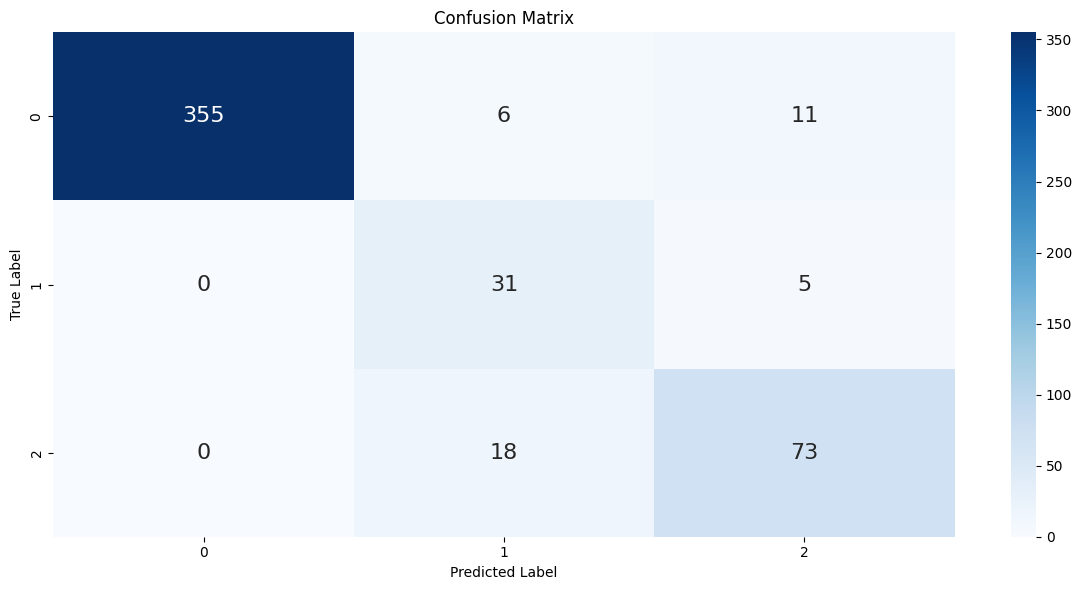

In [92]:
build_model(x_train_res, y_train_res, x_test, y_test, model_type='logistic' , class_weight = None, max_iter= 100, multi_class = 'auto', penalty='l1', solver='liblinear')

#### **KNN Classifier**

In [93]:
Best_knn_hyperparam = grid_search(x_train_res, y_train_res, 'knn', cv_strat)
Best_knn_hyperparam

Fitting 5 folds for each of 44 candidates, totalling 220 fits
[CV 1/5] END n_neighbors=3, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=uniform;, score=0.934 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=uniform;, score=0.917 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=uniform;, score=0.914 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=uniform;, score=0.920 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=1, weights=distance;, score=0.897 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=1, weights=distance;, score=0.917 total time=   0.0s
[CV 3/5] END n_neighbors=3, p=1, weights=distance;, score=0.903 total time=   0.0s
[CV 4/5] END n_neighbors=3, p=1, weights=distance;, score=0.897 total time=   0.0s
[CV 5/5] END n_neighbors=3, p=1, weights=distance;, score=0.903 total time=   0.0s
[CV 1/5] END n_neighbors=3, p=2, weights=uniform;, score=0.905 total time=   0.0s
[CV 2/5] END n_neighbors=3, p=2

{'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}

_________________________________________
============ Evaluate of Train set ============
The Accuracy : 0.9417
The Precision: 0.9352
The Recall   : 0.9296
The F1 Score : 0.9307
_________________________________________
============ Evaluate of Test set ============
The Accuracy: 0.89
The Recall: 0.82
The Precision: 0.75
The F1 Score: 0.77
Confusion Matrix:
[[353   6  13]
 [  1  29   6]
 [  7  21  63]]


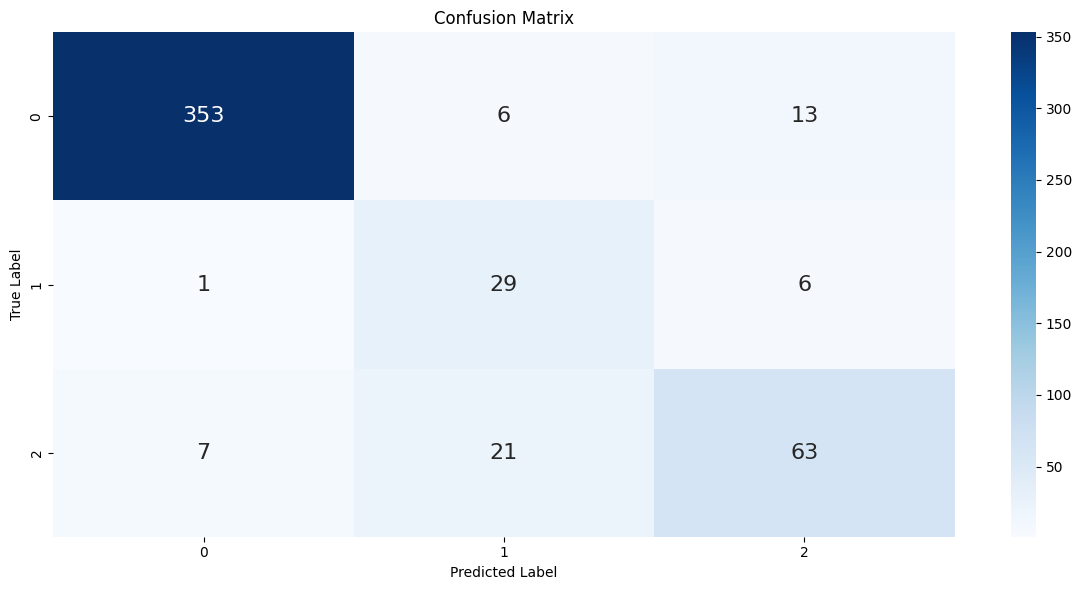

In [94]:
build_model(x_train_res, y_train_res, x_test, y_test, model_type='knn' , n_neighbors = 4, p= 1, weights = 'uniform')

#### **Decision Tree Classifier**

In [95]:
Best_dtree_hyperparam = grid_search(x_train_res, y_train_res, 'dtree', cv_strat)
Best_dtree_hyperparam

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.899 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.905 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.894 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.894 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.909 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.890 total time=   0.0s
[CV 2/5] END criterion

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

##### **Prediction and Evaluation of `DecisionTreeClassifier` Classifier Model**

_________________________________________
============ Evaluate of Train set ============
The Accuracy : 0.9592
The Precision: 0.9534
The Recall   : 0.9522
The F1 Score : 0.9526
_________________________________________
============ Evaluate of Test set ============
The Accuracy: 0.88
The Recall: 0.75
The Precision: 0.73
The F1 Score: 0.73
Confusion Matrix:
[[357   5  10]
 [  2  22  12]
 [ 11  19  61]]


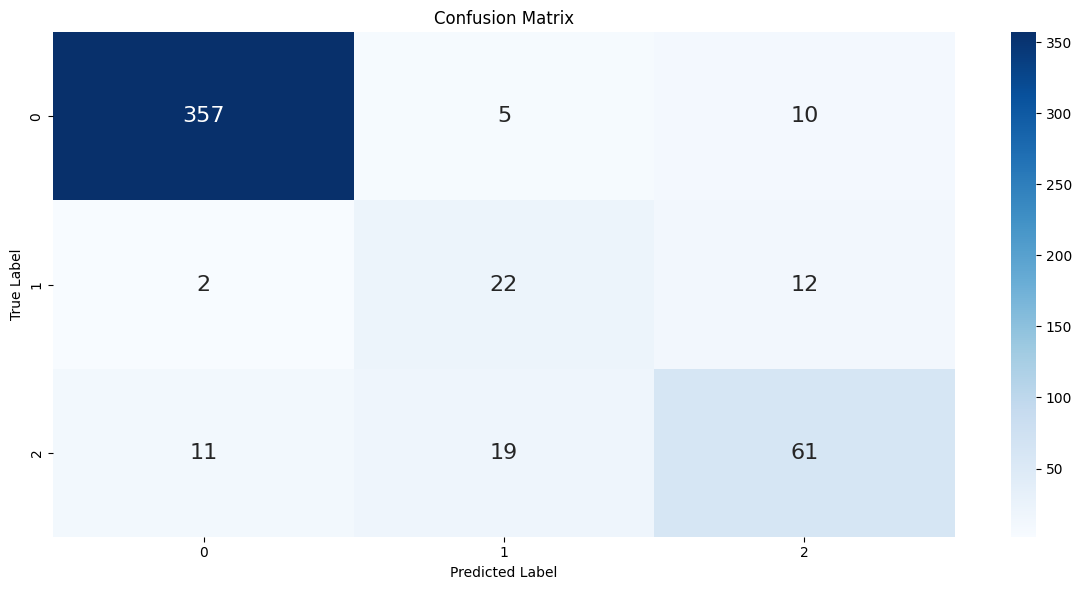

In [96]:
build_model(x_train_res, y_train_res, x_test, y_test, model_type='dtree' , criterion = 'entropy', max_depth= 10, max_features = None, min_samples_leaf=4, min_samples_split=10, splitter='best')

#### **SVM Classifier Model**

In [97]:
Best_svm_hyperparam = random_search(x_train_res, y_train_res, 'svm', cv_strat)
Best_svm_hyperparam

Best hyperparameters:  {'kernel': 'poly', 'gamma': 'scale', 'C': 10}
Best score:  0.9023606909615222


_________________________________________
============ Evaluate of Train set ============
The Accuracy : 0.9094
The Precision: 0.8991
The Recall   : 0.8929
The F1 Score : 0.8931
_________________________________________
============ Evaluate of Test set ============
The Accuracy: 0.90
The Recall: 0.85
The Precision: 0.76
The F1 Score: 0.79
Confusion Matrix:
[[349  10  13]
 [  2  31   3]
 [  0  23  68]]


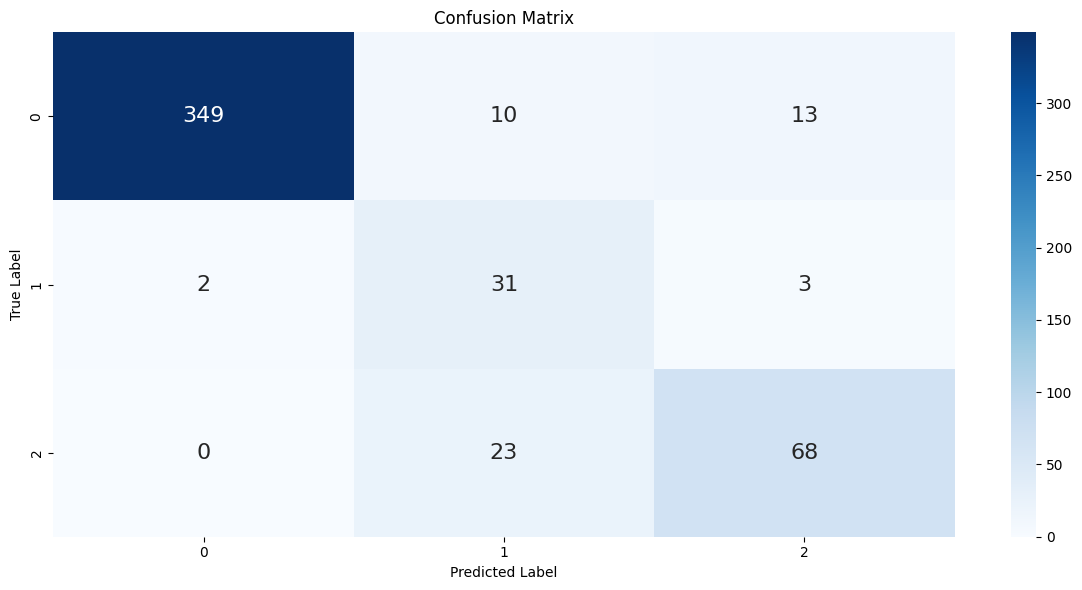

In [98]:
build_model(x_train_res, y_train_res, x_test, y_test, model_type='svm' , kernel = 'poly', gamma= 'scale', C = 10)

#### **Random Forest Classifier Model**

In [99]:
Best_rf_hyperparam = grid_search(x_train_res, y_train_res, 'random_forest', cv_strat)
Best_rf_hyperparam

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.910 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.926 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.911 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.923 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.919 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.914 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.926 total ti

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

##### **Prediction and Evaluation of `RandomForest` Classifier Model**

_________________________________________
============ Evaluate of Train set ============
The Accuracy : 0.9546
The Precision: 0.9468
The Recall   : 0.9496
The F1 Score : 0.9474
_________________________________________
============ Evaluate of Test set ============
The Accuracy: 0.90
The Recall: 0.78
The Precision: 0.74
The F1 Score: 0.76
Confusion Matrix:
[[356   6  10]
 [  3  20  13]
 [  0  17  74]]


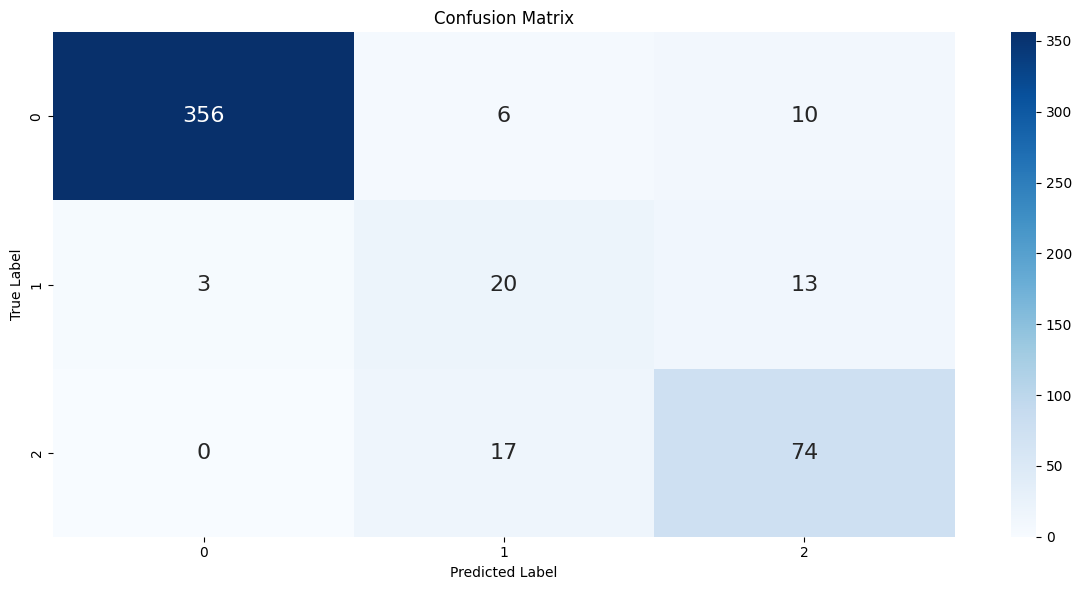

In [100]:
build_model(x_train_res, y_train_res, x_test, y_test, model_type='random_forest' , bootstrap = True, max_depth= 10, min_samples_leaf = 2, min_samples_split=10, n_estimators= 200)

#### **XGBOOST Classifier**

In [101]:
# XGBOOST Model 
estimator = XGBClassifier(random_state=42)

# Hyperprameters Tuning
search_space = {
    'max_depth': Integer(2,8),
    'learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode' : Real(0.5, 1.0),
    'reg_alpha': Real(0.0, 10.0),
    'reg_lambda': Real(0.0, 10.0),
    'gamma': Real(0.0, 10.0)
}


*Using `BayesSearchCV`*

In [102]:
# Bayesian Optimization
bayes = BayesSearchCV(estimator, search_space, cv=cv_strat, n_iter=10, scoring='accuracy', random_state=42) 
bayes.fit(x_train_res, y_train_res)

,estimator,"XGBClassifier...ree=None, ...)"
,search_spaces,"{'colsample_bylevel': Real(low=0.5,...m='normalize'), 'colsample_bynode': Real(low=0.5,...m='normalize'), 'colsample_bytree': Real(low=0.5,...m='normalize'), 'gamma': Real(low=0.0,...m='normalize'), ...}"
,optimizer_kwargs,None
,n_iter,10
,scoring,'accuracy'
,fit_params,None
,n_jobs,1
,n_points,1
,iid,'deprecated'
,refit,True
,cv,StratifiedKFo... shuffle=True)


In [103]:
bayes.best_score_
bayes.best_estimator_

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,0.5018151536273716
,colsample_bynode,0.9089150098318758
,colsample_bytree,0.8706413721840136
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [104]:
print(f"Best score: {bayes.best_score_}")
print(f"Best hyperparameters: {bayes.best_estimator_}")

Best score: 0.9330666365101354
Best hyperparameters: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5018151536273716,
              colsample_bynode=0.9089150098318758,
              colsample_bytree=0.8706413721840136, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=2.545542578640449, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.054449388745626506,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)


##### **Prediction and Evaluation of `XGBOOST` Classifier Model**

_________________________________________
============ Evaluate of Train set ============
The Accuracy : 0.9429
The Precision: 0.9363
The Recall   : 0.9320
The F1 Score : 0.9322
_________________________________________
============ Evaluate of Test set ============
The Accuracy: 0.91
The Recall: 0.84
The Precision: 0.78
The F1 Score: 0.80
Confusion Matrix:
[[356   6  10]
 [  4  27   5]
 [  0  18  73]]


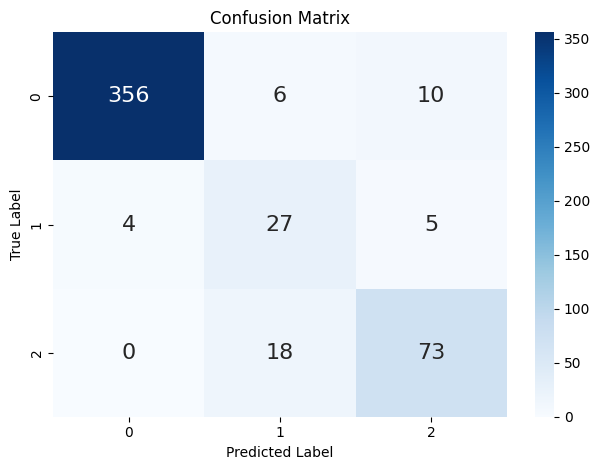

In [105]:
y_train_pred_bayes = bayes.predict(x_train_res)
# This evaluate of Train set
acc_train = accuracy_score(y_train_res, y_train_pred_bayes)
prec_train = precision_score(y_train_res, y_train_pred_bayes, average='macro')
rec_train = recall_score(y_train_res, y_train_pred_bayes, average='macro')
f1_train = f1_score(y_train_res, y_train_pred_bayes, average='macro')

print(41*'_')
# Print evaluate of Train set
print("============ Evaluate of Train set ============")
print(f"The Accuracy : {acc_train:.4f}")
print(f"The Precision: {prec_train:.4f}")
print(f"The Recall   : {rec_train:.4f}")
print(f"The F1 Score : {f1_train:.4f}")


y_pred_bayes = bayes.predict(x_test)


accuracy = accuracy_score(y_test, y_pred_bayes)
precision = precision_score(y_test, y_pred_bayes, average='macro')
recall = recall_score(y_test, y_pred_bayes, average='macro')
f1 = f1_score(y_test, y_pred_bayes, average='macro')

conf_matrix = confusion_matrix(y_test, y_pred_bayes)



print(41*'_')
print("============ Evaluate of Test set ============")
print(f'The Accuracy: {accuracy:.2f}')
print(f'The Recall: {recall:.2f}')
print(f'The Precision: {precision:.2f}')
print(f'The F1 Score: {f1:.2f}')

print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
    
    
plt.tight_layout()
plt.show()

#### **Comparison of Machine Learning Models**

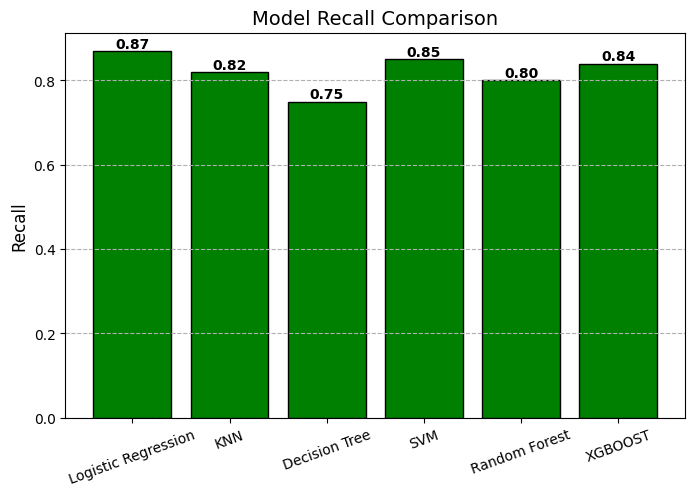

In [106]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'XGBOOST']
recalls = [0.87, 0.82, 0.75, 0.85, 0.80, 0.84]

plt.figure(figsize=(8, 5))

bars = plt.bar(models, recalls, color='green', edgecolor='black')

for bar in bars:
    #Column height
    yval = bar.get_height()
    
    # X-position ==> (bar.get_x() + bar.get_width()/2)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}", ha='center', va='bottom', fontsize=10, fontweight="bold")


plt.title("Model Recall Comparison", fontsize=14)
plt.ylabel('Recall', fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()
